#Lenguaje de señas MNIST
###*Reemplazo directo para MNIST para tareas de reconocimiento de gestos con las manos (“sign-language-mnist”)*

### Presentado por: 
Carlos Arbey Mejía Martínez Código: 2210549 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#@title Librerias utilizadas en el proyecto
!pip install mglearn
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
#########################################################################
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
######################Librerias de preprocesamiento######################
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
######################Dimensionalidad####################################
from sklearn.decomposition import PCA

##################Librería para almacenar objetos###################
import pickle
########################árboles de clasificación randomica############
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#@title Visualizacion Data Set
############Se realiza el cargue de nuestro Data Set
data_set = pd.read_csv('/content/drive/MyDrive/Proyecto_Machine_Learning/DataSet_Unificado.csv')
display(data_set.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
#@title Visualizacion Información alto nivel Data Set
print("#######################################################")
print("Etiqueta Objetivo:", np.unique(data_set['label']))
print("#######################################################")
print("Llaves del DataSet:\n", data_set.keys())
print("#######################################################")
print("Caracteristicas:\n", data_set.keys()[1:])
features = np.array(data_set.keys()[1:])
print("#######################################################")
print("Total Caracteristicas: ", np.count_nonzero(features))
print("#######################################################")
print("Cantidad de muestras: ",data_set['label'].count())
print("#######################################################")

#######################################################
Etiqueta Objetivo: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
#######################################################
Llaves del DataSet:
 Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
#######################################################
Caracteristicas:
 Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)
#######################################################
Total Caracteristicas:  784
############################

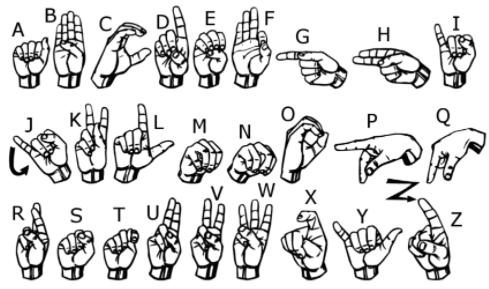

Fuente:https://www.kaggle.com/datamunge/sign-language-mnist?select=american_sign_language.PNG


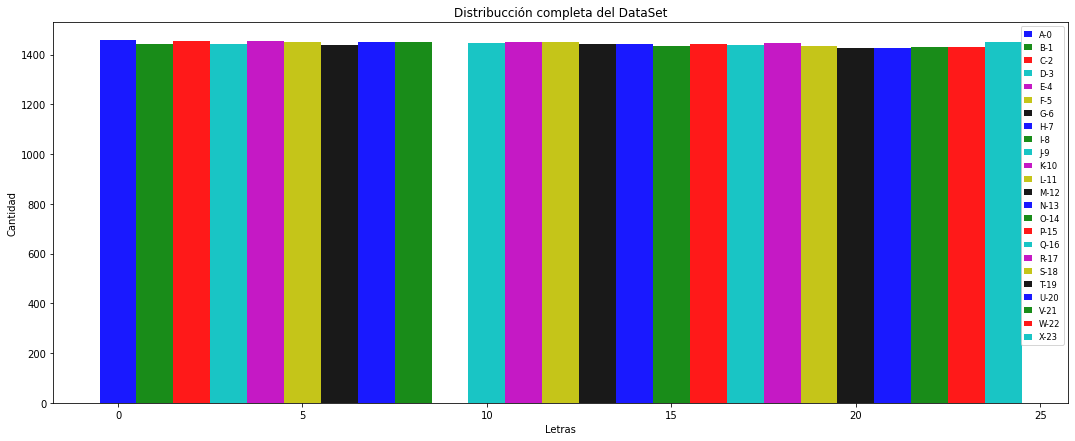

In [ ]:
#@title Visualizacion distribuccion de totales por letras

####Tabla de colores:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k',
          'b', 'g', 'r', 'c', 'm', 'y', 'k',
          'b', 'g', 'r', 'c', 'm', 'y', 'k',
          'b', 'g', 'r', 'c']
#Vector de nombre de targets
Target_name = np.array(['A-0','B-1','C-2','D-3','E-4',
                        'F-5','G-6','H-7','I-8','J-9',
                        'K-10','L-11','M-12','N-13','O-14',
                        'P-15','Q-16','R-17','S-18','T-19',
                        'U-20','V-21','W-22','X-23','Y-24','Z-25'])
#Se evidencia que el date set esta practicamente equilibrado por cada letra a evaluar:
#(unique, counts) = np.unique(data_set['label'], return_counts=True)
#print("Letras \n",Target_name)
#print("Totales \n",counts)

DataSet_targets = np.array(data_set['label'])
plt.figure(figsize=(40, 7))
plt.subplot(121)
plt.title("Distribucción completa del DataSet")
for i in np.unique(data_set['label']):
  plt.hist(DataSet_targets[DataSet_targets == i],color=colors[i], bins=1, alpha=0.9,histtype='stepfilled', label='stepfilled hist')
plt.xlabel("Letras")
plt.ylabel("Cantidad")
plt.legend(Target_name, loc='best', fontsize='small', labelspacing=0.5, handlelength=1)


plt.show()


#Validación DataSet genera:
Se evidencia que el DataSet tomado del repositorio Kaggle se encuentra equilibrado entre objetivos (Letras).

Tamaños DataSet 
:  Completo 34627 Entrenamiento:  24238 Validacion: 6856 Test 3533


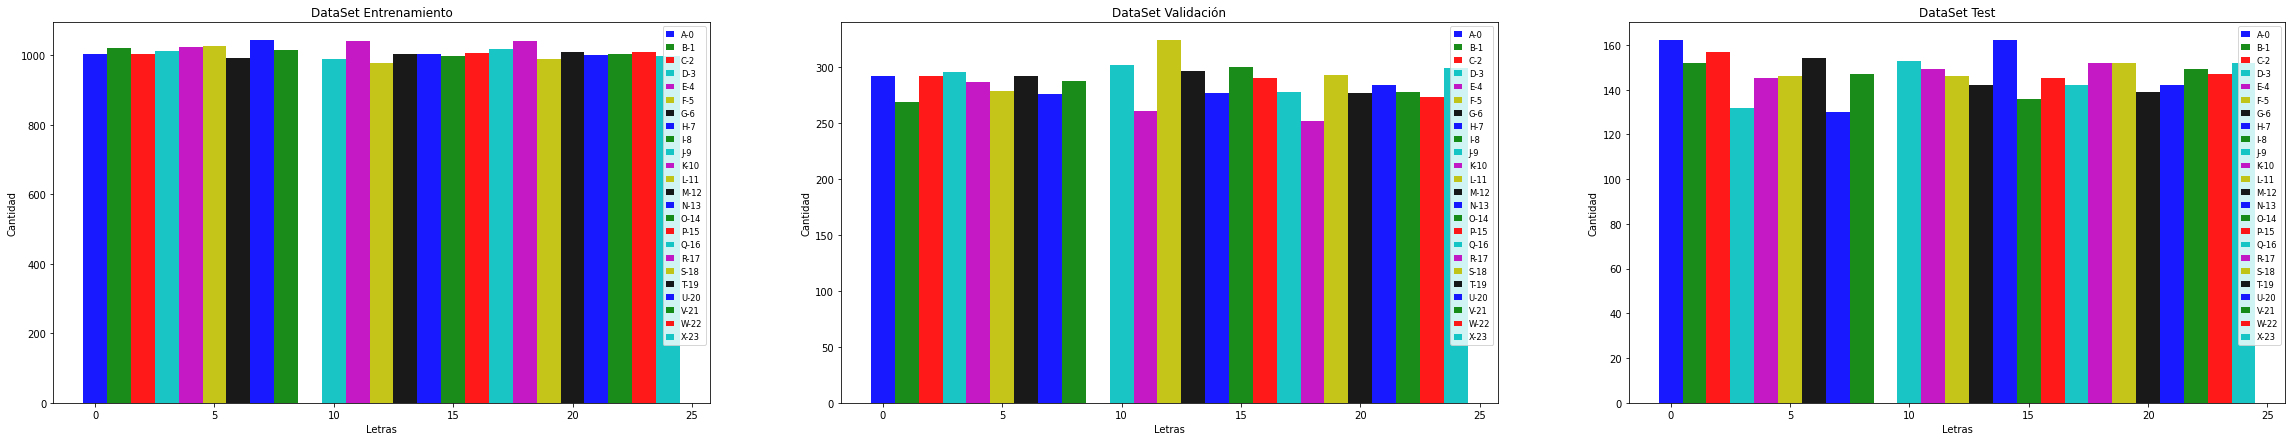

In [ ]:
#@title Distribucción del Data Set
##Ds_Train -- Data set de entrenamiento
##Ds_Valid -- Data set de validacion 
##Ds_Test  -- Data set de Test
##Rs_Train -- Predicion entrenamiento
##Rs_Valid -- Predicion Validacion
##Rs_Test  -- Predicion Test

Distribuccion_Data =  1#@param

##X Matriz de caracteristicas.
X = data_set[data_set.keys()[1:]]

##Y Matriz de Objetivos.
Y =  data_set[['label']]

###Distribucción de los Data Sets que se usaran en el proyecto:
Ds_Train, Ds_Valid, Rs_Train, Rs_Valid = train_test_split(X,Y,test_size=0.3, random_state=13)
Ds_Valid, Ds_Test, Rs_Valid, Rs_Test   = train_test_split(Ds_Valid,Rs_Valid,test_size=0.34, random_state=13)

print("Tamaños DataSet \n: ","Completo",data_set['label'].count(),"Entrenamiento: ", Rs_Train['label'].count(), "Validacion:", Rs_Valid['label'].count(), "Test", Rs_Test['label'].count())
######################################################################
####Se Grafica la distribucción de datos del DataSet ######
###############Vector de targets###########################
#Vector de entrenamiento
target_train = np.array(Rs_Train['label'])
#Vector de validación
target_Valid = np.array(Rs_Valid['label'])
#Vector de Test
target_Test = np.array(Rs_Test['label'])
#####################################################################################################
##############Se gráfica la distribucción de los data set de entrenamiento, validación y pruebas ####
#####################################################################################################
plt.figure(figsize=(40, 7))
plt.subplot(131)
plt.title("DataSet Entrenamiento")
for i in np.unique(data_set['label']):
  plt.hist(target_train[target_train == i],color=colors[i], bins=1, alpha=0.9,histtype='stepfilled', label='stepfilled hist')
plt.xlabel("Letras")
plt.ylabel("Cantidad")
plt.legend(Target_name, loc='best', fontsize='small', labelspacing=0.5, handlelength=1)

plt.subplot(132)
plt.title("DataSet Validación")
for i in np.unique(data_set['label']):
  plt.hist(target_Valid[target_Valid == i],color=colors[i], bins=1, alpha=0.9,histtype='stepfilled', label='stepfilled hist')
plt.xlabel("Letras")
plt.ylabel("Cantidad")
plt.legend(Target_name, loc='best', fontsize='small', labelspacing=0.5, handlelength=1)

plt.subplot(133)
plt.title("DataSet Test")
for i in np.unique(data_set['label']):
  plt.hist(target_Test[target_Test == i],color=colors[i], bins=1, alpha=0.9,histtype='stepfilled', label='stepfilled hist')
plt.xlabel("Letras")
plt.ylabel("Cantidad")
plt.legend(Target_name, loc='best', fontsize='small', labelspacing=0.5, handlelength=1)
plt.show()

#Conclusión distribucción DataSet:
Se utilizaran 3 Data set distribuidos de la siguiente manera:


*   Entrenamiento - Aproximadamente 70% (24238)
*   Validación    - Aproximadamente 20% (6856)
*   Test          - Aproximadamente 10% (3533)



#1. Procesamiento de datos
Como etapa inicial del proyecto se realizará el procesamiento de los datos utilizando los siguientes modelos de la librería sklearn:

*  **StandardScaler**: Estandarice las características eliminando la media y escalando las unidades en varianza, 
*  **Normalizer**:Normaliza las muestras individualmente a la norma de la unidad. Presenta como parámetro poder normalizar con L1.
*  **MinMaxScaler**: Transforma características escalando cada característica a un rango determinado.

Dado que nuestro DataSet presenta tantas características 784, vamos a realizar una reducción de dimensionalidad del DataSet utilizando PCA, pero previamente utilizaremos lasso para generar el número de características que realmente aportan al modelo para así poder utilizar el hiperparametro de PCA.

In [ ]:
#@title Clase propia con utilidades del proyecto
class Utilidades :
  def save_hdisk (modelo, name):
      filename = name
      outfile = open(filename,'wb')
      pickle.dump(modelo,outfile)
      outfile.close()
  def input_hdisk(name):
    infile = open(name,'rb')
    modelo = pickle.load(infile)
    infile.close()
    return modelo
  ###Método cuya utilidad es generar el modelo de PCA dado los paramtros # de componentes y el dataset
  def modelo_pca (Componentes, DataSet):
    pca = PCA(n_components=Componentes)
    pca.fit(DataSet) # Obtiene los principales componentes.
    return pca
  ####Método de transformación del modelo entrenado de PCA. Se pasa como parámetros el modelo y el dataSet  
  def transformacion_pca (modelo, DataSet) :
    # Se transforma el DataSet
    DataSetResult = modelo.transform(DataSet)
    return DataSetResult
  def datos_complejidad(n_neighbors, DataSetTraind_F, DataSetTraind_T,DataSetTest_F, DataSetTest_T):    
    mejor_vecino = np.array([0.0,0.0])
    training_accuracy = [] 
    valid_accuracy = []    
    ###Evaluamos la cantidad de vecinos parametrizados.
    for HPar_neighbors in n_neighbors:          
      ###Se evita el vecino número 0 dado que no se puede.
      if HPar_neighbors != 0:      
        ###Se genera el objeto del modelo con el vecino a evaluar.
        modelo = KNeighborsClassifier(n_neighbors=HPar_neighbors)
        ###Se entrena el modelo.
        modelo.fit(DataSetTraind_F, DataSetTraind_T)
        ###Guardamos las metricas de resultado del modelo con el data set de entrenamiento.
        Puntaje_Train = modelo.score(DataSetTraind_F, DataSetTraind_T)
        training_accuracy.append(Puntaje_Train)    
        ###Guardamos las metricas de resultado del modelo con el data set de validación.
        Puntaje_Valid = modelo.score(DataSetTest_F, DataSetTest_T)
        valid_accuracy.append(Puntaje_Valid)
        ##########################################
        #####Se valida cual es el mejor vecino:
        ##########################################
        if HPar_neighbors == 1:
          mejor_vecino[0] = HPar_neighbors ###Vecino
          print("Entrando en el primer vecino ",Puntaje_Valid)
          mejor_vecino[1] = Puntaje_Valid  ###Puntaje
        else:
          if Puntaje_Valid > mejor_vecino[1] :
            mejor_vecino[0] = HPar_neighbors ###Vecino
            mejor_vecino[1] = Puntaje_Valid  ###Puntaje
      else:  
        ###Se guarda 0 dado que el vecino 0 no lo vamos a evaluar.
        training_accuracy.append(0)
        valid_accuracy.append(0)
    return training_accuracy,valid_accuracy,mejor_vecino  
  ###Este método tiene como utilidad generar un vector con el # iteraciones dado generando nuevos valores dividiendo cada iteración por
  ###por 1000, 100 , 10, 1    
  def V_Regularization(Numero_iteraciones):
    Vr_alpha = np.arange(Numero_iteraciones) 
    alphas = []
    for i in Vr_alpha:
      if i != 0:
        alphas.append(i/1000)
        alphas.append(i/100)
        alphas.append(i/10)
        alphas.append(i)
      else:
        alphas.append(0)  
    return np.sort(alphas)    
  ###Método para generar el análisis de complejidad por el tipo de modelo regularización logística  
  def datos_complejidad_2(Regularization, DataSetTraind_F, DataSetTraind_T,DataSetTest_F, DataSetTest_T):    
    mejor_c = np.array([0.0,0.0])
    training_accuracy = [] 
    valid_accuracy = []    
    ###Evaluamos la cantidad de vecinos parametrizados.
    for N_Regularization in Regularization:          
      ###Se evita el vecino número 0 dado que no se puede.
      print("#################################### ", N_Regularization)
      if N_Regularization != 0:      
        ###Se genera el objeto del modelo con el vecino a evaluar.
        modelo = LogisticRegression(C=N_Regularization)
        ###Se entrena el modelo.
        modelo.fit(DataSetTraind_F, DataSetTraind_T)
        ###Guardamos las metricas de resultado del modelo con el data set de entrenamiento.
        Puntaje_Train = modelo.score(DataSetTraind_F, DataSetTraind_T)
        training_accuracy.append(Puntaje_Train)    
        ###Guardamos las metricas de resultado del modelo con el data set de validación.
        Puntaje_Valid = modelo.score(DataSetTest_F, DataSetTest_T)
        valid_accuracy.append(Puntaje_Valid)
        ##########################################
        #####Se valida cual es el mejor vecino:
        ##########################################
        if N_Regularization == 1:
          mejor_c[0] = N_Regularization ###Vecino
          print("Entrando en el primer vecino ",Puntaje_Valid)
          mejor_c[1] = N_Regularization  ###Puntaje
        else:
          if Puntaje_Valid > mejor_c[1] :
            mejor_c[0] = N_Regularization ###Vecino
            mejor_c[1] = Puntaje_Valid  ###Puntaje
      else:  
        ###Se guarda 0 dado que el vecino 0 no lo vamos a evaluar.
        training_accuracy.append(0)
        valid_accuracy.append(0)
    return training_accuracy,valid_accuracy,mejor_c 
  ###Método para generar el análisis de complejidad por el tipo de modelo de árboles randomicos.
  def datos_complejidad_3(estimators, DataSetTraind_F, DataSetTraind_T,DataSetTest_F, DataSetTest_T, Max_depth):        
    mejor_c = np.array([0.0,0.0])
    training_accuracy = [] 
    valid_accuracy = []    
    ###Evaluamos la cantidad de vecinos parametrizados.
    for N_estimators in estimators:          
      ###Se evita el vecino número 0 dado que no se puede.
      print("#################################### ", N_estimators)
      if N_estimators != 0:      
        ###Se genera el objeto del modelo con el vecino a evaluar.
        modelo = RandomForestClassifier(n_estimators=N_estimators, random_state=2,max_depth = Max_depth)
        ###Se entrena el modelo.
        modelo.fit(DataSetTraind_F, DataSetTraind_T)
        ###Guardamos las metricas de resultado del modelo con el data set de entrenamiento.
        Puntaje_Train = modelo.score(DataSetTraind_F, DataSetTraind_T)
        training_accuracy.append(Puntaje_Train)    
        ###Guardamos las metricas de resultado del modelo con el data set de validación.
        Puntaje_Valid = modelo.score(DataSetTest_F, DataSetTest_T)
        valid_accuracy.append(Puntaje_Valid)
        ##########################################
        #####Se valida cual es el mejor vecino:
        ##########################################
        if N_estimators == 1:
          mejor_c[0] = N_estimators ###Vecino
          print("Entrando en el primer random Forest ",Puntaje_Valid)
          mejor_c[1] = N_estimators  ###Puntaje
        else:
          if Puntaje_Valid > mejor_c[1] :
            mejor_c[0] = N_estimators ###Vecino
            mejor_c[1] = Puntaje_Valid  ###Puntaje
      else:  
        ###Se guarda 0 dado que el vecino 0 no lo vamos a evaluar.
        training_accuracy.append(0)
        valid_accuracy.append(0)
    return training_accuracy,valid_accuracy,mejor_c 
    


In [ ]:
#@title Entranamiento con lasso para verificar el número de características o coeficientes usados. Se realiza el entrenamiento del DataSet de entrenamiento con lasso.
##Se realiza el entrenamiento del DataSet de entrenamiento con lasso.
lasso = Lasso().fit(Ds_Train, target_train)
#print("Training set score: {:.2f}".format(lasso.score(Ds_Train, target_train)))
Num_feactures =  np.sum(lasso.coef_ != 0)
print("####################################################")
print("Número de características usadas:",Num_feactures)
print("####################################################")

####################################################
Número de características usadas: 288
####################################################


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.75632072647568, tolerance: 130.30141079709531
  positive)


En el preprocesamiento de los datos utilizaremos los métodos StandarScaler, Normalizer y MinMaxScaler. Estos métodos se combinaran de la siguientes manera para todos:



*   Se transforman los Data Set de entrenamiento, validación y test en cada uno de los métodos indicados anteriormente.
*   Se genera un modelo utilizando PCA indicando el número de componentes que encontramos con lasso.
*   Se genera un modelo utilizando PCA indicando el procentaje de distribución esperado del 95%.

Con los pasos indicados anteriormente se crearon nuevos DataSet de entreneamiento, validación y test para cada metodología indicada (StandarScaler, Normalizer y MinMaxScaler).



In [ ]:
#@title Procesamiento de datos con StandardScaler
Std_scaler = StandardScaler()
###Se entrena el modelo:
Std_scaler.fit(Ds_Train)
##########################################################################
###Se genera la transformación de los Data Sets del proyecto: ############
Ds_Train_std = Std_scaler.transform(Ds_Train)
Ds_Valid_std = Std_scaler.transform(Ds_Valid)
Ds_Test_std = Std_scaler.transform(Ds_Test)
################################################
##Se genera un nuevo DataSet utilizando PCA con dos componentes para su graficación#####
print("Número de componentes a usar: ", Num_feactures)
pca_std = Utilidades.modelo_pca(Num_feactures,Ds_Train_std)
Ds_Train_std_pca = Utilidades.transformacion_pca(pca_std,Ds_Train_std)
Ds_Valid_std_pca = Utilidades.transformacion_pca(pca_std,Ds_Valid_std)
Ds_Test_std_pca = Utilidades.transformacion_pca(pca_std,Ds_Test_std)
#################################################
##Se genera un DataSet utilizando PCA pero parametrización al modelo para que asigne la cantidad de 
##de caracteristicas cuya cantidad de varianza sea mayor a 95%
pca_std_aut = Utilidades.modelo_pca(0.95,Ds_Train_std)
print('Compenentes PCA Var. 95% = ', pca_std_aut.components_.shape)
Ds_Train_std_pca_aut = Utilidades.transformacion_pca(pca_std_aut,Ds_Train_std)
Ds_Valid_std_pca_aut = Utilidades.transformacion_pca(pca_std_aut,Ds_Valid_std)
Ds_Test_std_pca_aut = Utilidades.transformacion_pca(pca_std_aut,Ds_Test_std)

# Propiedades de los data Set
print("Original shape: {}".format(Ds_Train.shape))
print("transformado shape PCA con lasso : {}".format(Ds_Train_std_pca.shape))
print("transformado shape PCA con 95% : {}".format(Ds_Train_std_pca_aut.shape))






Número de componentes a usar:  288
Compenentes PCA Var. 95% =  (116, 784)
Original shape: (24238, 784)
transformado shape PCA con lasso : (24238, 288)
transformado shape PCA con 95% : (24238, 116)


In [ ]:
#@title Procesamiento de datos con Normalizer
norm_scaler = Normalizer()
###Se entrena el modelo:
norm_scaler.fit(Ds_Train)
##########################################################################
###Se genera la transformación de los Data Sets del proyecto: ############
Ds_Train_norm = norm_scaler.transform(Ds_Train)
Ds_Valid_norm = norm_scaler.transform(Ds_Valid)
Ds_Test_norm = norm_scaler.transform(Ds_Test)

################################################
##Se genera un nuevo DataSet utilizando PCA con dos componentes para su graficación#####
print("Número de componentes a usar: ", Num_feactures)
pca_norm = Utilidades.modelo_pca(Num_feactures,Ds_Train_norm)
Ds_Train_norm_pca = Utilidades.transformacion_pca(pca_norm,Ds_Train_norm)
Ds_Valid_norm_pca = Utilidades.transformacion_pca(pca_norm,Ds_Valid_norm)
Ds_Test_norm_pca = Utilidades.transformacion_pca(pca_norm,Ds_Test_norm)

#################################################
##Se genera un DataSet utilizando PCA pero parametrización al modelo para que asigne la cantidad de 
##de caracteristicas cuya cantidad de varianza sea mayor a 95%
pca_norm_aut = Utilidades.modelo_pca(0.95,Ds_Train_norm)
print('Compenentes PCA Var. 95% = ', pca_norm_aut.components_.shape)
Ds_Train_norm_pca_aut = Utilidades.transformacion_pca(pca_norm_aut,Ds_Train_norm)
Ds_Valid_norm_pca_aut = Utilidades.transformacion_pca(pca_norm_aut,Ds_Valid_norm)
Ds_Test_norm_pca_aut = Utilidades.transformacion_pca(pca_norm_aut,Ds_Test_norm)

# Propiedades de los data Set
print("Original shape: {}".format(Ds_Train.shape))
print("transformado shape PCA con lasso : {}".format(Ds_Train_norm_pca.shape))
print("transformado shape PCA con 95% : {}".format(Ds_Train_norm_pca_aut.shape))


Número de componentes a usar:  288
Compenentes PCA Var. 95% =  (149, 784)
Original shape: (24238, 784)
transformado shape PCA con lasso : (24238, 288)
transformado shape PCA con 95% : (24238, 149)


In [ ]:
#@title Procesamiento de datos con MinMaxScaler
min_scaler = MinMaxScaler()
###Se entrena el modelo:
min_scaler.fit(Ds_Train)
##########################################################################
###Se genera la transformación de los Data Sets del proyecto: ############
Ds_Train_min = min_scaler.transform(Ds_Train)
Ds_Valid_min = min_scaler.transform(Ds_Valid)
Ds_Test_min = min_scaler.transform(Ds_Test)

################################################
##Se genera un nuevo DataSet utilizando PCA con dos componentes para su graficación#####
print("Número de componentes a usar: ", Num_feactures)
pca_min = Utilidades.modelo_pca(Num_feactures,Ds_Train_min)
Ds_Train_min_pca = Utilidades.transformacion_pca(pca_min,Ds_Train_min)
Ds_Valid_min_pca = Utilidades.transformacion_pca(pca_min,Ds_Valid_min)
Ds_Test_min_pca = Utilidades.transformacion_pca(pca_min,Ds_Test_min)

# print dataset properties before and after scaling
print("Original shape: {}".format(Ds_Train.shape))
print("transformed shape: {}".format(Ds_Train_min_pca.shape))

#################################################
##Se genera un DataSet utilizando PCA pero parametrización al modelo para que asigne la cantidad de 
##de caracteristicas cuya cantidad de varianza sea mayor a 95%
pca_min_aut = Utilidades.modelo_pca(0.95,Ds_Train_min)
print('Compenentes PCA Var. 95% = ', pca_min_aut.components_.shape)
Ds_Train_min_pca_aut = Utilidades.transformacion_pca(pca_min_aut,Ds_Train_min)
Ds_Valid_min_pca_aut = Utilidades.transformacion_pca(pca_min_aut,Ds_Valid_min)
Ds_Test_min_pca_aut = Utilidades.transformacion_pca(pca_min_aut,Ds_Test_min)

# Propiedades de los data Set
print("Original shape: {}".format(Ds_Train.shape))
print("transformado shape PCA con lasso : {}".format(Ds_Train_min_pca.shape))
print("transformado shape PCA con 95% : {}".format(Ds_Train_min_pca_aut.shape))




Número de componentes a usar:  288
Original shape: (24238, 784)
transformed shape: (24238, 288)
Compenentes PCA Var. 95% =  (115, 784)
Original shape: (24238, 784)
transformado shape PCA con lasso : (24238, 288)
transformado shape PCA con 95% : (24238, 115)


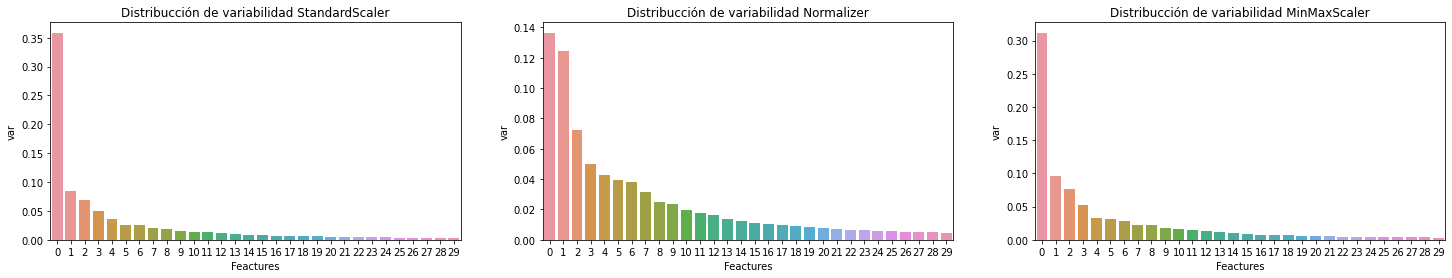

In [ ]:
#@title Gráfica de distribucción de varianza con PCA utilizando los componentes encontrados con el modelo lasso previamente generado. Se presentan las primera 30 características del entrenamiento con lasso
##Se crea vector con el número de caracteristica generadas con lasso
feactures = np.arange(Num_feactures)
##Se crean los data frame con la información de varianza de los datos generados por PCA
Data_var_std = pd.DataFrame({'var':pca_std.explained_variance_ratio_, 'Feactures':feactures})
Data_var_norm = pd.DataFrame({'var':pca_norm.explained_variance_ratio_, 'Feactures':feactures})
Data_var_min = pd.DataFrame({'var':pca_min.explained_variance_ratio_, 'Feactures':feactures})
####Se gráfica la información de distribucción de varianza generados con cada modelo de procesamiento de datos:
plt.figure(figsize=(25, 4))
plt.subplot(131)
ax = sns.barplot(x='Feactures', y='var', data=Data_var_std[Data_var_std.Feactures<30])
ax.set_title('Distribucción de variabilidad StandardScaler')

plt.subplot(132)
ax = sns.barplot(x='Feactures', y='var', data=Data_var_norm[Data_var_norm.Feactures<30])
ax.set_title('Distribucción de variabilidad Normalizer')

plt.subplot(133)
ax = sns.barplot(x='Feactures', y='var', data=Data_var_min[Data_var_min.Feactures<30])
ax.set_title('Distribucción de variabilidad MinMaxScaler')

plt.show()

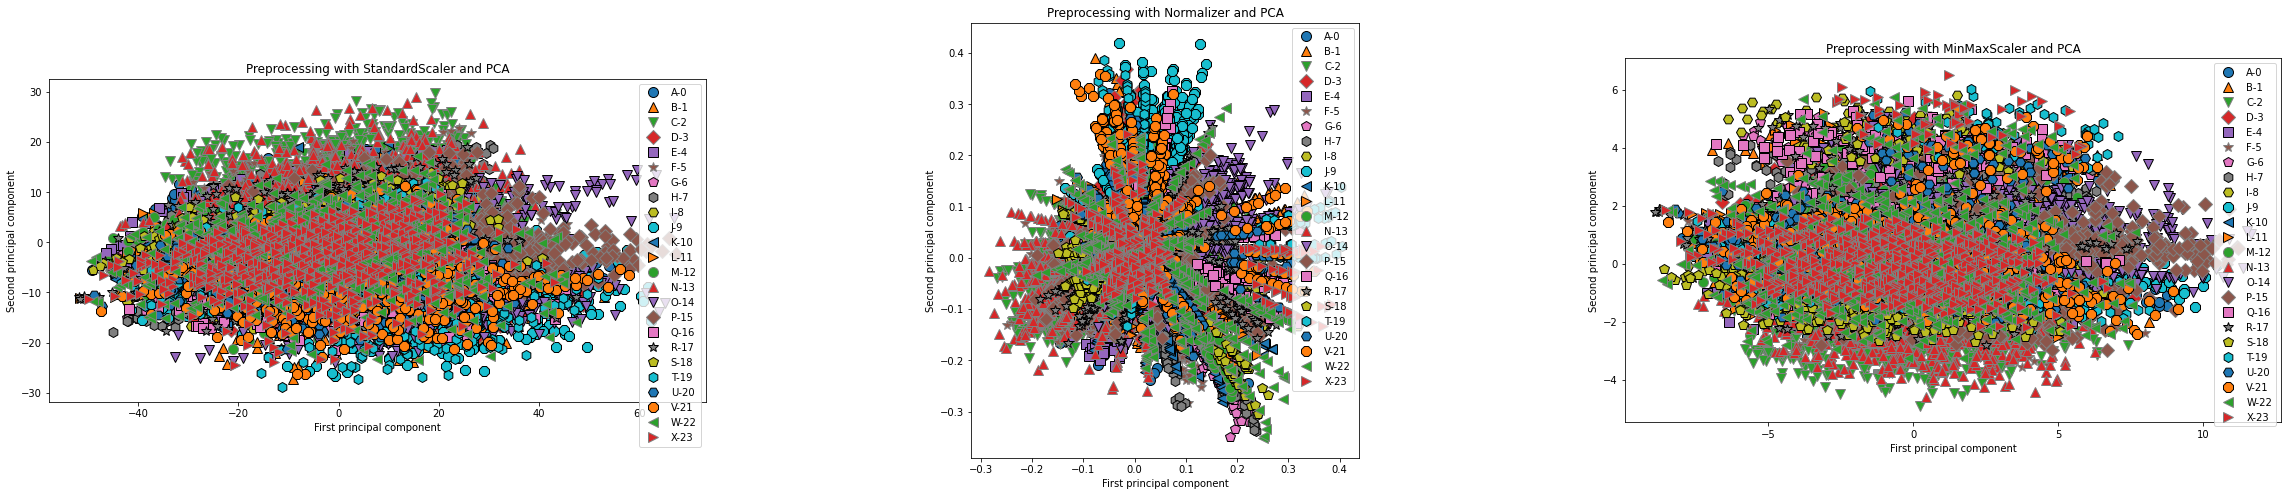

In [ ]:
#@title Gráficas de los 3 modelos de procesamiento de datos con PCA (Con el número de componentes utilizando el modelo lasso) tomando las caracteristicas que presentan la mayor varianza de los datos.
# plot first vs. second principal component, colored by class

plt.figure(figsize=(40, 8))
plt.subplot(131)
plt.title("Preprocessing with StandardScaler and PCA")
mglearn.discrete_scatter(Ds_Train_std_pca[:, 0], Ds_Train_std_pca[:, 1], target_train)
plt.legend(Target_name, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.subplot(132)
plt.title("Preprocessing with Normalizer and PCA")
mglearn.discrete_scatter(Ds_Train_norm_pca[:, 0], Ds_Train_norm_pca[:, 1], target_train)
plt.legend(Target_name, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.subplot(133)
plt.title("Preprocessing with MinMaxScaler and PCA")
mglearn.discrete_scatter(Ds_Train_min_pca[:, 0], Ds_Train_min_pca[:, 1], target_train)
plt.legend(Target_name, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


plt.show()

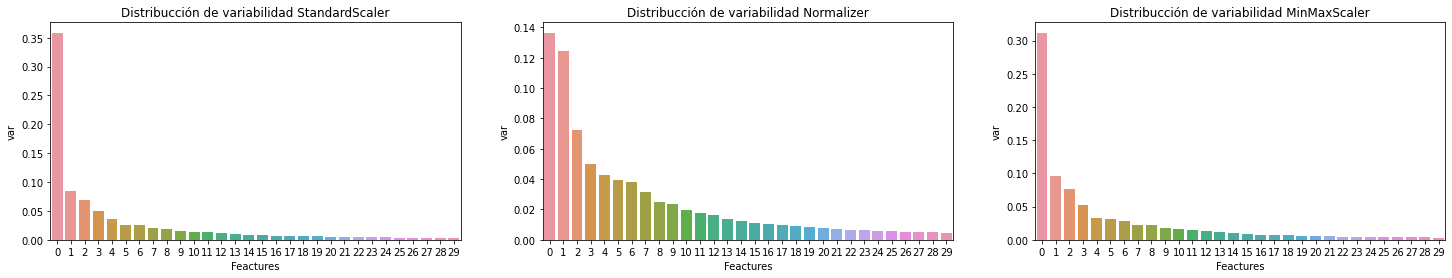

In [ ]:
#@title Gráfica de distribucción de varianza con PCA utilizando los componentes que presentan una varianza superior al 95%. Se presentan las primera 30 características del entrenamiento con lasso
##Se crean los vectores con el número de caracteristica generadas con la distribucción del 95%
feactures_aut = np.arange(pca_std_aut.components_.shape[0])
feactures_norm = np.arange(pca_norm_aut.components_.shape[0])
feactures_min = np.arange(pca_min_aut.components_.shape[0])
##Se crean los data frame con la información de varianza de los datos generados por PCA
Data_var_std_aut = pd.DataFrame({'var':pca_std_aut.explained_variance_ratio_, 'Feactures':feactures_aut})
Data_var_norm_aut = pd.DataFrame({'var':pca_norm_aut.explained_variance_ratio_, 'Feactures':feactures_norm})
Data_var_min_aut = pd.DataFrame({'var':pca_min_aut.explained_variance_ratio_, 'Feactures':feactures_min})
####Se gráfica la información de distribucción de varianza generados con cada modelo de procesamiento de datos:
plt.figure(figsize=(25, 4))
plt.subplot(131)
#[Data_var_std.Feactures<30]
ax = sns.barplot(x='Feactures', y='var', data=Data_var_std_aut[Data_var_std_aut.Feactures<30])
ax.set_title('Distribucción de variabilidad StandardScaler')

plt.subplot(132)
ax = sns.barplot(x='Feactures', y='var', data=Data_var_norm_aut[Data_var_norm_aut.Feactures<30])
ax.set_title('Distribucción de variabilidad Normalizer')

plt.subplot(133)
ax = sns.barplot(x='Feactures', y='var', data=Data_var_min_aut[Data_var_min_aut.Feactures<30])
ax.set_title('Distribucción de variabilidad MinMaxScaler')

plt.show()

#**2. Validación de modelos de solución:**
### 1. Validación utilizando KNN-neighbour clasificación con modelo StandardScaler

In [ ]:
#@title Análisis de Complejidad, se realiza el análisis de complejidad con los modelos de procesamiento de datos StandarScaler, Normalizer y MiMaxScaler utilizando PCA con los componentes generados con lasso
# Hiper parámetros
Numero_iteraciones =  10
Vr_neighbors = np.arange(Numero_iteraciones) 

############Se realiza el analisis de complejidad del modelo con procesamiento StandardScaler######
training_accuracy_std = [] 
valid_accuracy_std = []
mejor_vecino_std = []
training_accuracy_std,valid_accuracy_std,mejor_vecino_std = Utilidades.datos_complejidad(Vr_neighbors, Ds_Train_std_pca, Rs_Train,Ds_Valid_std_pca, Rs_Valid)

############Se realiza el analisis de complejidad del modelo con procesamiento Normalizer######
training_accuracy_norm = [] 
valid_accuracy_norm = []
mejor_vecino_norm = []
training_accuracy_norm,valid_accuracy_norm,mejor_vecino_norm = Utilidades.datos_complejidad(Vr_neighbors, Ds_Train_norm_pca, Rs_Train,Ds_Valid_norm_pca, Rs_Valid)

############Se realiza el analisis de complejidad del modelo con procesamiento MinMaxScaler######
training_accuracy_min = [] 
valid_accuracy_min = []
mejor_vecino_min = []
training_accuracy_min,valid_accuracy_min,mejor_vecino_min = Utilidades.datos_complejidad(Vr_neighbors, Ds_Train_min_pca, Rs_Train,Ds_Valid_min_pca, Rs_Valid)


print("################################################")
print("Mejor Vecino con StandardScaler \n", mejor_vecino_std)
print("Mejor Vecino con Normalizer \n", mejor_vecino_norm)
print("Mejor Vecino con MinMaxScaler \n", mejor_vecino_min)
print("################################################")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Entrando en el primer vecino  0.9989789964994166


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed

Entrando en el primer vecino  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed

Entrando en el primer vecino  0.9991248541423571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed

################################################
Mejor Vecino con StandardScaler 
 [1.       0.998979]
Mejor Vecino con Normalizer 
 [1. 1.]
Mejor Vecino con MinMaxScaler 
 [1.         0.99912485]
################################################


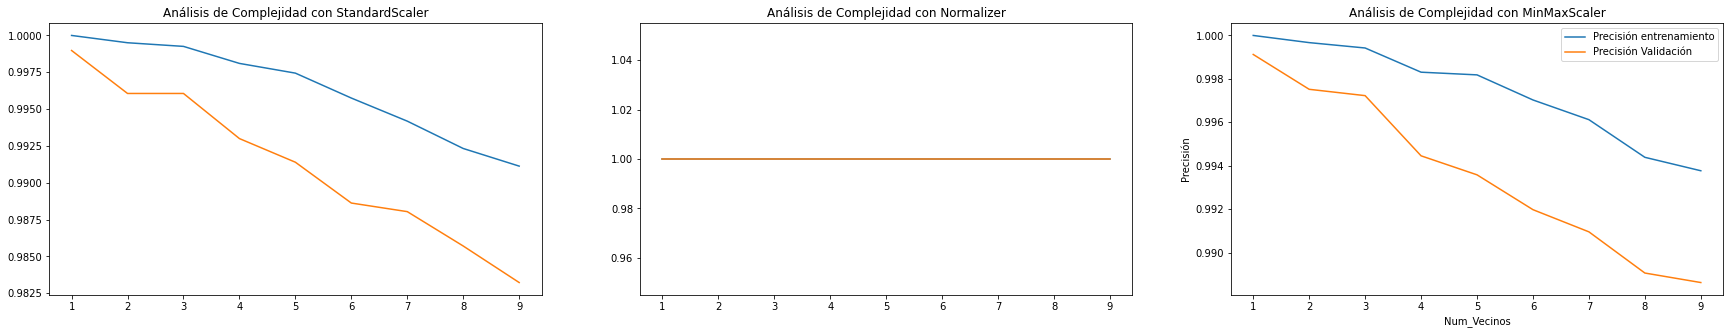

In [ ]:
#@title Análisis de Complejidad:

plt.figure(figsize=(30, 5))
plt.subplot(131)
plt.title("Análisis de Complejidad con StandardScaler")
plt.plot(Vr_neighbors[1:], training_accuracy_std[1:], label="Precisión entrenamiento")
plt.plot(Vr_neighbors[1:], valid_accuracy_std[1:], label="Precisión Validación")
plt.legend()

plt.subplot(132)
plt.title("Análisis de Complejidad con Normalizer")
plt.plot(Vr_neighbors[1:], training_accuracy_norm[1:], label="Precisión entrenamiento")
plt.plot(Vr_neighbors[1:], valid_accuracy_norm[1:], label="Precisión Validación")
plt.legend()

plt.subplot(133)
plt.title("Análisis de Complejidad con MinMaxScaler")
plt.plot(Vr_neighbors[1:], training_accuracy_min[1:], label="Precisión entrenamiento")
plt.plot(Vr_neighbors[1:], valid_accuracy_min[1:], label="Precisión Validación")

plt.ylabel("Precisión")
plt.xlabel("Num_Vecinos")
plt.legend()
plt.show()

In [ ]:
#@title Mátrix Confusión, Utilizamos nuestro hiperparametro óptimo de 1 vecino por los modelos de procesamiento de datos StandarScaler, Normalizer y MinMaxScaler

HPar_neighbors = 1  ###Tomamos nuestra cantidad de vecinos optimo.

############################StandardScaler###############################
modelo_knn_std = KNeighborsClassifier(n_neighbors=HPar_neighbors)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_knn_std.fit(Ds_Train_std_pca, Rs_Train)
Rs_pred_Valid_std = modelo_knn_std.predict(Ds_Valid_std_pca)
Rs_pred_test_std = modelo_knn_std.predict(Ds_Test_std_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_knn_std,'modelo_knn_std')
##########################################################################

############################StandardScaler###############################
modelo_knn_norm = KNeighborsClassifier(n_neighbors=HPar_neighbors)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_knn_norm.fit(Ds_Train_norm_pca, Rs_Train)
Rs_pred_Valid_norm = modelo_knn_norm.predict(Ds_Valid_norm_pca)
Rs_pred_test_norm = modelo_knn_norm.predict(Ds_Test_norm_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_knn_norm,'modelo_knn_norm')
##########################################################################

############################StandardScaler###############################
modelo_knn_min = KNeighborsClassifier(n_neighbors=HPar_neighbors)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_knn_min.fit(Ds_Train_min_pca, Rs_Train)
Rs_pred_Valid_min = modelo_knn_min.predict(Ds_Valid_min_pca)
Rs_pred_test_min = modelo_knn_min.predict(Ds_Test_min_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_knn_min,'modelo_knn_min')
##########################################################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Text(0.5, 1.0, 'Matriz de confusión KNN con MinMaxScaler')

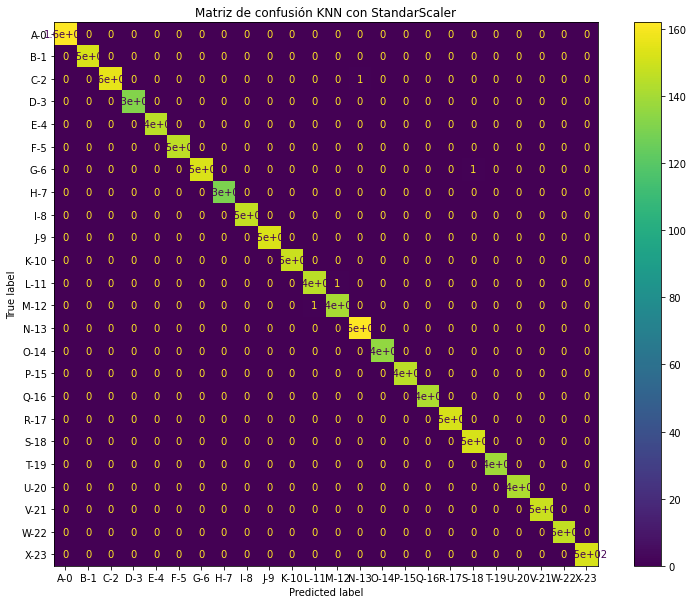

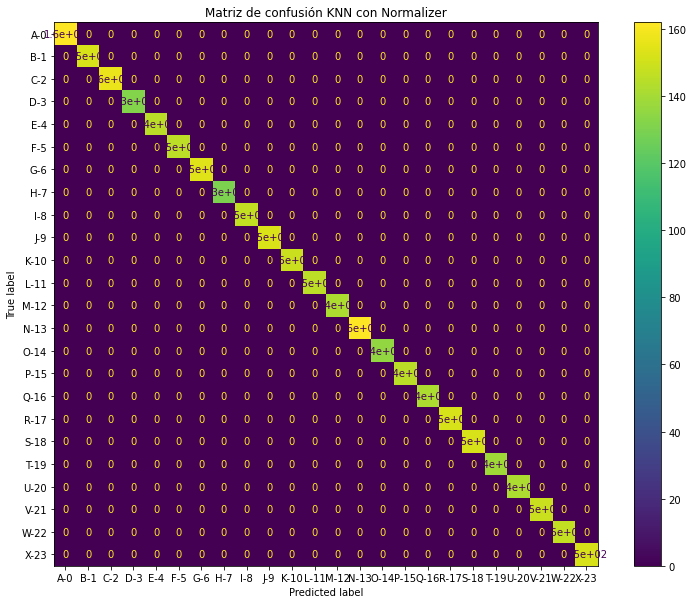

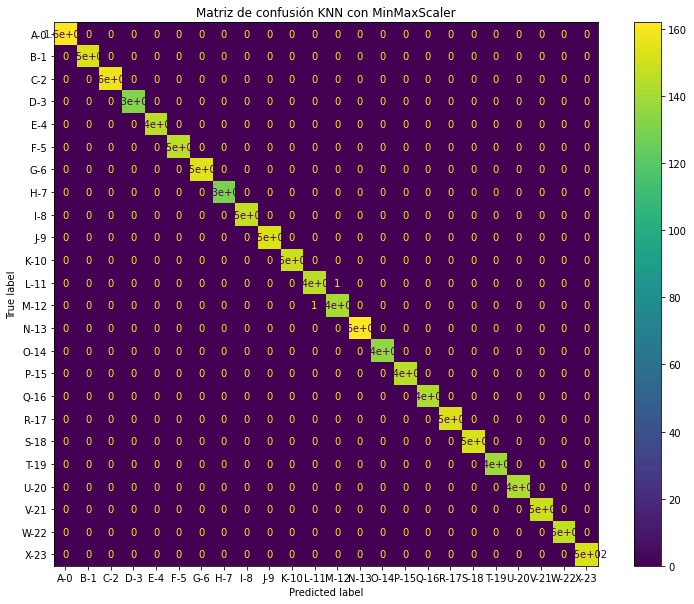

In [ ]:
#@title Generamos la mátrix de confución evaluando nuestras muestras reales Vs los resultados del modelo evaluando el dataset de validación.

###Pintamos la mátrix de confusión:###############
fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_knn_std, Ds_Test_std_pca, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con StandarScaler')

fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_knn_norm, Ds_Test_norm_pca, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con Normalizer')

fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_knn_min, Ds_Test_min_pca, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con MinMaxScaler')

In [ ]:
#@title Análisis de las métricas de clasificación del modelo:
###Generamos la métricas de la mátrix de confusión:
####Precisión - Recall - Accuracy
pp = precision_score(Rs_Test, Rs_pred_test_std, average='macro')
rc = recall_score(Rs_Test, Rs_pred_test_std, average='macro')
ac = accuracy_score(Rs_Test, Rs_pred_test_std)

pp1 = precision_score(Rs_Test, Rs_pred_test_norm, average='macro')
rc1 = recall_score(Rs_Test, Rs_pred_test_norm, average='macro')
ac1 = accuracy_score(Rs_Test, Rs_pred_test_norm)

pp2 = precision_score(Rs_Test, Rs_pred_test_min, average='macro')
rc2 = recall_score(Rs_Test, Rs_pred_test_min, average='macro')
ac2 = accuracy_score(Rs_Test, Rs_pred_test_min)

subgroup_performance_metrics = {
    'PRECISION': pp, 
    'RECALL': rc,
    'ACCURACY': ac            
}
subgroup_performance_metrics1 = {
    'PRECISION': pp1, 
    'RECALL': rc1,
    'ACCURACY': ac1            
}
subgroup_performance_metrics2 = {
    'PRECISION': pp2, 
    'RECALL': rc2,
    'ACCURACY': ac2
}
performance_df = pd.DataFrame([subgroup_performance_metrics,
                               subgroup_performance_metrics1,
                               subgroup_performance_metrics2],
                              index=["MÉTRICAS KNN-neighbour with StandarScaler",
                                     "MÉTRICAS KNN-neighbour with Normalizer",
                                     "MÉTRICAS KNN-neighbour with MinMaxScaler"])
performance_df

,PRECISION,RECALL,ACCURACY
MÉTRICAS KNN-neighbour with StandarScaler,0.998893,0.998885,0.998868
MÉTRICAS KNN-neighbour with Normalizer,1.000000,1.000000,1.000000
MÉTRICAS KNN-neighbour with MinMaxScaler,0.999421,0.999421,0.999434


In [ ]:
#@title Análisis de Complejidad, se realiza el análisis de complejidad con los modelos de procesamiento de datos StandarScaler, Normalizer y MiMaxScaler utilizando PCA con los componentes generan un varianza superior al 95%
# Hiper parámetros
Numero_iteraciones =  10
Vr_neighbors = np.arange(Numero_iteraciones) 

############Se realiza el analisis de complejidad del modelo con procesamiento StandardScaler######
training_accuracy_std_aut = [] 
valid_accuracy_std_aut = []
mejor_vecino_std_aut = []
training_accuracy_std_aut,valid_accuracy_std_aut,mejor_vecino_std_aut = Utilidades.datos_complejidad(Vr_neighbors, Ds_Train_std_pca_aut, Rs_Train,Ds_Valid_std_pca_aut, Rs_Valid)

############Se realiza el analisis de complejidad del modelo con procesamiento Normalizer######
training_accuracy_norm_aut = [] 
valid_accuracy_norm_aut = []
mejor_vecino_norm_aut = []
training_accuracy_norm_aut,valid_accuracy_norm_aut,mejor_vecino_norm_aut = Utilidades.datos_complejidad(Vr_neighbors, Ds_Train_norm_pca_aut, Rs_Train,Ds_Valid_norm_pca_aut, Rs_Valid)

############Se realiza el analisis de complejidad del modelo con procesamiento MinMaxScaler######
training_accuracy_min_aut = [] 
valid_accuracy_min_aut = []
mejor_vecino_min_aut = []
training_accuracy_min_aut,valid_accuracy_min_aut,mejor_vecino_min_aut = Utilidades.datos_complejidad(Vr_neighbors, Ds_Train_min_pca_aut, Rs_Train,Ds_Valid_min_pca_aut, Rs_Valid)


print("################################################")
print("Mejor Vecino con StandardScaler \n", mejor_vecino_std_aut)
print("Mejor Vecino con Normalizer \n", mejor_vecino_norm_aut)
print("Mejor Vecino con MinMaxScaler \n", mejor_vecino_min_aut)
print("################################################")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Entrando en el primer vecino  0.9986872812135356


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed

Entrando en el primer vecino  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed

Entrando en el primer vecino  0.9988331388564761


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed

################################################
Mejor Vecino con StandardScaler 
 [1.         0.99868728]
Mejor Vecino con Normalizer 
 [1. 1.]
Mejor Vecino con MinMaxScaler 
 [1.         0.99883314]
################################################


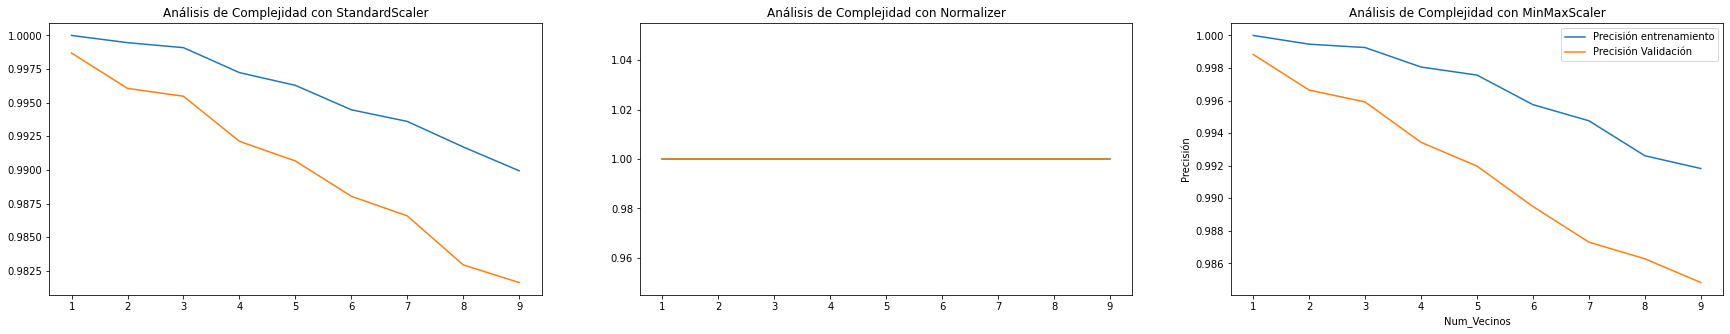

In [ ]:
#@title Análisis de Complejidad:

plt.figure(figsize=(30, 5))
plt.subplot(131)
plt.title("Análisis de Complejidad con StandardScaler")
plt.plot(Vr_neighbors[1:], training_accuracy_std_aut[1:], label="Precisión entrenamiento")
plt.plot(Vr_neighbors[1:], valid_accuracy_std_aut[1:], label="Precisión Validación")
plt.legend()

plt.subplot(132)
plt.title("Análisis de Complejidad con Normalizer")
plt.plot(Vr_neighbors[1:], training_accuracy_norm_aut[1:], label="Precisión entrenamiento")
plt.plot(Vr_neighbors[1:], valid_accuracy_norm_aut[1:], label="Precisión Validación")
plt.legend()

plt.subplot(133)
plt.title("Análisis de Complejidad con MinMaxScaler")
plt.plot(Vr_neighbors[1:], training_accuracy_min_aut[1:], label="Precisión entrenamiento")
plt.plot(Vr_neighbors[1:], valid_accuracy_min_aut[1:], label="Precisión Validación")

plt.ylabel("Precisión")
plt.xlabel("Num_Vecinos")
plt.legend()
plt.show()

In [ ]:
#@title Mátrix Confusión, Utilizamos nuestro hiperparametro óptimo de 1 vecino por los modelos de procesamiento de datos StandarScaler, Normalizer y MinMaxScaler

HPar_neighbors = 1  ###Tomamos nuestra cantidad de vecinos optimo.

############################StandardScaler###############################
modelo_knn_std_aut = KNeighborsClassifier(n_neighbors=HPar_neighbors)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_knn_std_aut.fit(Ds_Train_std_pca_aut, Rs_Train)
Rs_pred_Valid_std_aut = modelo_knn_std_aut.predict(Ds_Valid_std_pca_aut)
Rs_pred_test_std_aut = modelo_knn_std_aut.predict(Ds_Test_std_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_knn_std_aut,'modelo_knn_std')
##########################################################################

############################StandardScaler###############################
modelo_knn_norm_aut = KNeighborsClassifier(n_neighbors=HPar_neighbors)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_knn_norm_aut.fit(Ds_Train_norm_pca_aut, Rs_Train)
Rs_pred_Valid_norm_aut = modelo_knn_norm_aut.predict(Ds_Valid_norm_pca_aut)
Rs_pred_test_norm_aut = modelo_knn_norm_aut.predict(Ds_Test_norm_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_knn_norm_aut,'modelo_knn_norm')
##########################################################################

############################StandardScaler###############################
modelo_knn_min_aut = KNeighborsClassifier(n_neighbors=HPar_neighbors)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_knn_min_aut.fit(Ds_Train_min_pca_aut, Rs_Train)
Rs_pred_Valid_min_aut = modelo_knn_min_aut.predict(Ds_Valid_min_pca_aut)
Rs_pred_test_min_aut = modelo_knn_min_aut.predict(Ds_Test_min_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_knn_min_aut,'modelo_knn_min')
##########################################################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Text(0.5, 1.0, 'Matriz de confusión KNN con MinMaxScaler')

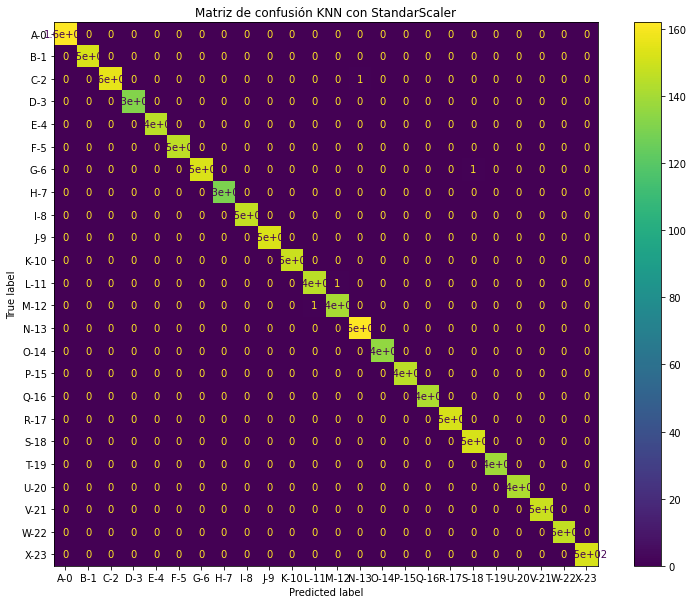

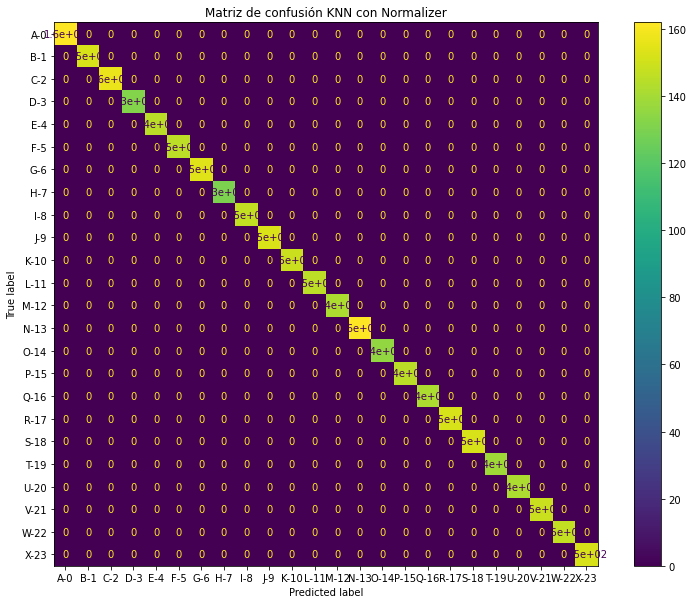

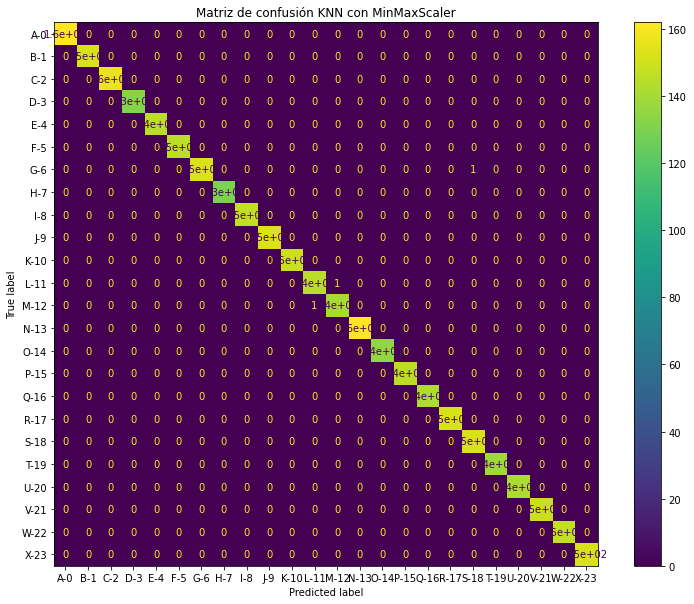

In [ ]:
#@title Generamos la mátrix de confución evaluando nuestras muestras reales Vs los resultados del modelo evaluando el dataset de validación.

###Pintamos la mátrix de confusión:###############
fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_knn_std_aut, Ds_Test_std_pca_aut, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con StandarScaler')

fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_knn_norm_aut, Ds_Test_norm_pca_aut, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con Normalizer')

fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_knn_min_aut, Ds_Test_min_pca_aut, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con MinMaxScaler')

In [ ]:
#@title Análisis de las métricas de clasificación del modelo:
###Generamos la métricas de la mátrix de confusión:
####Precisión - Recall - Accuracy
pp = precision_score(Rs_Test, Rs_pred_test_std_aut, average='macro')
rc = recall_score(Rs_Test, Rs_pred_test_std_aut, average='macro')
ac = accuracy_score(Rs_Test, Rs_pred_test_std_aut)

pp1 = precision_score(Rs_Test, Rs_pred_test_norm_aut, average='macro')
rc1 = recall_score(Rs_Test, Rs_pred_test_norm_aut, average='macro')
ac1 = accuracy_score(Rs_Test, Rs_pred_test_norm_aut)

pp2 = precision_score(Rs_Test, Rs_pred_test_min_aut, average='macro')
rc2 = recall_score(Rs_Test, Rs_pred_test_min_aut, average='macro')
ac2 = accuracy_score(Rs_Test, Rs_pred_test_min_aut)

subgroup_performance_metrics = {
    'PRECISION': pp, 
    'RECALL': rc,
    'ACCURACY': ac            
}
subgroup_performance_metrics1 = {
    'PRECISION': pp1, 
    'RECALL': rc1,
    'ACCURACY': ac1            
}
subgroup_performance_metrics2 = {
    'PRECISION': pp2, 
    'RECALL': rc2,
    'ACCURACY': ac2
}
performance_df = pd.DataFrame([subgroup_performance_metrics,
                               subgroup_performance_metrics1,
                               subgroup_performance_metrics2],
                              index=["MÉTRICAS KNN-neighbour with StandarScaler",
                                     "MÉTRICAS KNN-neighbour with Normalizer",
                                     "MÉTRICAS KNN-neighbour with MinMaxScaler"])
performance_df

,PRECISION,RECALL,ACCURACY
MÉTRICAS KNN-neighbour with StandarScaler,0.998893,0.998885,0.998868
MÉTRICAS KNN-neighbour with Normalizer,1.000000,1.000000,1.000000
MÉTRICAS KNN-neighbour with MinMaxScaler,0.999149,0.999151,0.999151


### 2. Validación utilizando **Regresión lógistica** para clasificación

In [ ]:
#@title Análisis de Complejidad, se realiza el análisis de complejidad con los modelos de procesamiento de datos StandarScaler, Normalizer y MiMaxScaler  utilizando PCA con los componentes generados con lasso
# Hiper parámetros
Numero_iteraciones =  5
v_c = Utilidades.V_Regularization(Numero_iteraciones)
print(v_c)
############Se realiza el analisis de complejidad del modelo con procesamiento StandardScaler######
training_accuracy_std = [] 
valid_accuracy_std = []
mejor_c_std = []
training_accuracy_std,valid_accuracy_std,mejor_c_std = Utilidades.datos_complejidad_2(v_c, Ds_Train_std_pca, Rs_Train,Ds_Valid_std_pca, Rs_Valid)


############Se realiza el analisis de complejidad del modelo con procesamiento Normalizer######
training_accuracy_norm = [] 
valid_accuracy_norm = []
mejor_c_norm = []
training_accuracy_norm,valid_accuracy_norm,mejor_c_norm = Utilidades.datos_complejidad_2(v_c, Ds_Train_norm_pca, Rs_Train,Ds_Valid_norm_pca, Rs_Valid)

############Se realiza el analisis de complejidad del modelo con procesamiento MinMaxScaler######
training_accuracy_min = [] 
valid_accuracy_min = []
mejor_vecino_min = []
training_accuracy_min,valid_accuracy_min,mejor_c_min = Utilidades.datos_complejidad_2(v_c, Ds_Train_min_pca, Rs_Train,Ds_Valid_min_pca, Rs_Valid)


print("################################################")
print("Mejor Vecino con StandardScaler \n", mejor_c_std)
print("Mejor Vecino con Normalizer \n", mejor_c_norm)
print("Mejor Vecino con MinMaxScaler \n", mejor_c_min)
print("################################################")



[0.e+00 1.e-03 2.e-03 3.e-03 4.e-03 1.e-02 2.e-02 3.e-02 4.e-02 1.e-01
 2.e-01 3.e-01 4.e-01 1.e+00 2.e+00 3.e+00 4.e+00]
####################################  0.0
####################################  0.001


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

####################################  0.002


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.003


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.004


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.02


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.03


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.04


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Entrando en el primer vecino  0.9998541423570595
####################################  2.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  3.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  4.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.0
####################################  0.001
####################################  0.002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.003


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.004


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.02


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.03


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.04


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Entrando en el primer vecino  0.7113477246207701
####################################  2.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  3.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  4.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.0
####################################  0.001
####################################  0.002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.003


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.004


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.02


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.03


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.04


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

####################################  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Entrando en el primer vecino  0.998541423570595
####################################  2.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  3.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  4.0
################################################
Mejor Vecino con StandardScaler 
 [1. 1.]
Mejor Vecino con Normalizer 
 [1. 1.]
Mejor Vecino con MinMaxScaler 
 [1. 1.]
################################################


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


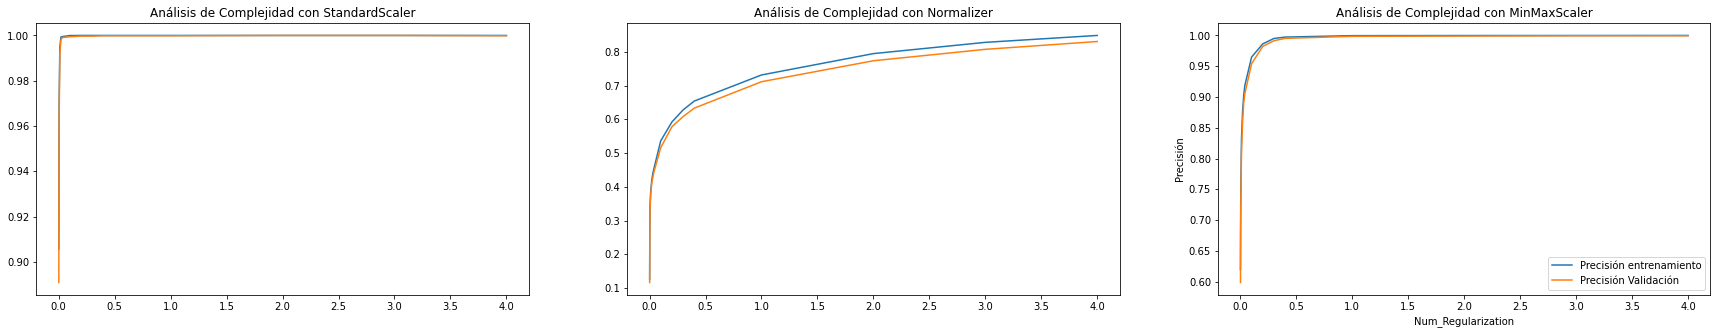

In [ ]:
#@title Análisis de Complejidad:
plt.figure(figsize=(30, 5))
plt.subplot(131)
plt.title("Análisis de Complejidad con StandardScaler")
plt.plot(v_c[1:], training_accuracy_std[1:], label="Precisión entrenamiento")
plt.plot(v_c[1:], valid_accuracy_std[1:], label="Precisión Validación")
plt.legend()

plt.subplot(132)
plt.title("Análisis de Complejidad con Normalizer")
plt.plot(v_c[1:], training_accuracy_norm[1:], label="Precisión entrenamiento")
plt.plot(v_c[1:], valid_accuracy_norm[1:], label="Precisión Validación")
plt.legend()

plt.subplot(133)
plt.title("Análisis de Complejidad con MinMaxScaler")
plt.plot(v_c[1:], training_accuracy_min[1:], label="Precisión entrenamiento")
plt.plot(v_c[1:], valid_accuracy_min[1:], label="Precisión Validación")

plt.ylabel("Precisión")
plt.xlabel("Num_Regularization")
plt.legend()
plt.show()

In [ ]:
#@title Mátrix Confusión, Utilizamos nuestro hiperparametro óptimo de C=1 por los modelos de procesamiento de datos StandarScaler, Normalizer y MinMaxScaler

n_c = 1  ###Tomamos nuestra cantidad de vecinos optimo.

############################StandardScaler###############################
modelo_rlg_std = LogisticRegression(C=n_c)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_rlg_std.fit(Ds_Train_std_pca, Rs_Train)
Rs_pred_Valid_std = modelo_rlg_std.predict(Ds_Valid_std_pca)
Rs_pred_test_std = modelo_rlg_std.predict(Ds_Test_std_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_rlg_std,'modelo_rgl_std')
##########################################################################

############################StandardScaler###############################
modelo_rlg_norm = LogisticRegression(C=n_c)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_rlg_norm.fit(Ds_Train_norm_pca, Rs_Train)
Rs_pred_Valid_norm = modelo_rlg_norm.predict(Ds_Valid_norm_pca)
Rs_pred_test_norm = modelo_rlg_norm.predict(Ds_Test_norm_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_rlg_norm,'modelo_rgl_norm')
##########################################################################

############################StandardScaler###############################
modelo_rlg_min = LogisticRegression(C=n_c)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_rlg_min.fit(Ds_Train_min_pca, Rs_Train)
Rs_pred_Valid_min = modelo_rlg_min.predict(Ds_Valid_min_pca)
Rs_pred_test_min = modelo_rlg_min.predict(Ds_Test_min_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_rlg_min,'modelo_rgl_min')
##########################################################################


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

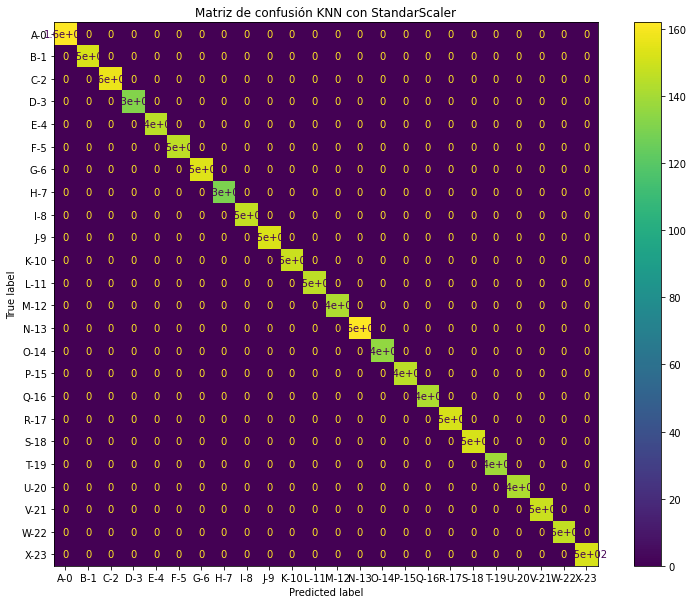

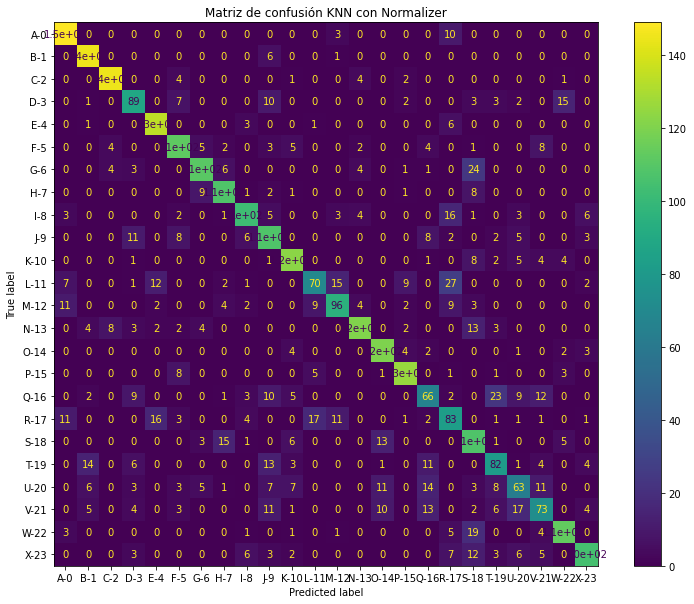

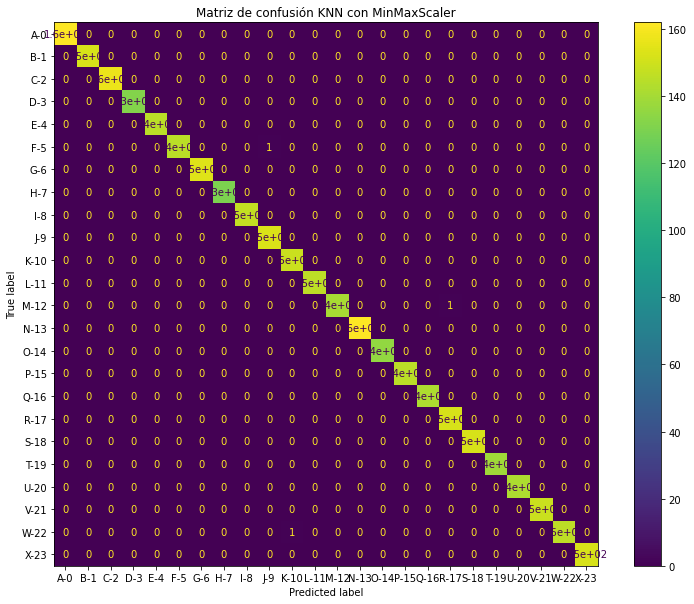

In [ ]:
#@title Generamos la mátrix de confución evaluando nuestras muestras reales Vs los resultados del modelo evaluando el dataset de validación.

###Pintamos la mátrix de confusión:###############
fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_rlg_std, Ds_Test_std_pca, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con StandarScaler')

fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_rlg_norm, Ds_Test_norm_pca, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con Normalizer')

fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_rlg_min, Ds_Test_min_pca, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con MinMaxScaler')

plt.show()

In [ ]:
#@title Análisis de las métricas de clasificación del modelo:
###Generamos la métricas de la mátrix de confusión:
####Precisión - Recall - Accuracy
pp = precision_score(Rs_Test, Rs_pred_test_std, average='macro')
rc = recall_score(Rs_Test, Rs_pred_test_std, average='macro')
ac = accuracy_score(Rs_Test, Rs_pred_test_std)

pp1 = precision_score(Rs_Test, Rs_pred_test_norm, average='macro')
rc1 = recall_score(Rs_Test, Rs_pred_test_norm, average='macro')
ac1 = accuracy_score(Rs_Test, Rs_pred_test_norm)

pp2 = precision_score(Rs_Test, Rs_pred_test_min, average='macro')
rc2 = recall_score(Rs_Test, Rs_pred_test_min, average='macro')
ac2 = accuracy_score(Rs_Test, Rs_pred_test_min)

subgroup_performance_metrics = {
    'PRECISION': pp, 
    'RECALL': rc,
    'ACCURACY': ac            
}
subgroup_performance_metrics1 = {
    'PRECISION': pp1, 
    'RECALL': rc1,
    'ACCURACY': ac1            
}
subgroup_performance_metrics2 = {
    'PRECISION': pp2, 
    'RECALL': rc2,
    'ACCURACY': ac2
}
performance_df = pd.DataFrame([subgroup_performance_metrics,
                               subgroup_performance_metrics1,
                               subgroup_performance_metrics2],
                              index=["MÉTRICAS Logistic Regression with StandarScaler",
                                     "MÉTRICAS Logistic Regression with Normalizer",
                                     "MÉTRICAS Logistic Regression with MinMaxScaler"])
performance_df

,PRECISION,RECALL,ACCURACY
MÉTRICAS Logistic Regression with StandarScaler,1.000000,1.000000,1.000000
MÉTRICAS Logistic Regression with Normalizer,0.721802,0.721021,0.722615
MÉTRICAS Logistic Regression with MinMaxScaler,0.999179,0.999138,0.999151


In [ ]:
#@title Análisis de Complejidad, se realiza el análisis de complejidad con los modelos de procesamiento de datos StandarScaler, Normalizer y MiMaxScaler   utilizando PCA con los componentes generan un varianza superior al 95%
# Hiper parámetros
Numero_iteraciones =  5
v_c = Utilidades.V_Regularization(Numero_iteraciones)
print(v_c)
############Se realiza el analisis de complejidad del modelo con procesamiento StandardScaler######
training_accuracy_std_aut = [] 
valid_accuracy_std_aut = []
mejor_c_std_aut = []
training_accuracy_std_aut,valid_accuracy_std_aut,mejor_c_std_aut = Utilidades.datos_complejidad_2(v_c, Ds_Train_std_pca_aut, Rs_Train,Ds_Valid_std_pca_aut, Rs_Valid)


############Se realiza el analisis de complejidad del modelo con procesamiento Normalizer######
training_accuracy_norm_aut = [] 
valid_accuracy_norm_aut = []
mejor_c_norm_aut = []
training_accuracy_norm_aut,valid_accuracy_norm_aut,mejor_c_norm_aut = Utilidades.datos_complejidad_2(v_c, Ds_Train_norm_pca_aut, Rs_Train,Ds_Valid_norm_pca_aut, Rs_Valid)

############Se realiza el analisis de complejidad del modelo con procesamiento MinMaxScaler######
training_accuracy_min_aut = [] 
valid_accuracy_min_aut = []
mejor_vecino_min_aut = []
training_accuracy_min_aut,valid_accuracy_min_aut,mejor_c_min_aut = Utilidades.datos_complejidad_2(v_c, Ds_Train_min_pca_aut, Rs_Train,Ds_Valid_min_pca_aut, Rs_Valid)


print("################################################")
print("Mejor Vecino con StandardScaler \n", mejor_c_std_aut)
print("Mejor Vecino con Normalizer \n", mejor_c_norm_aut)
print("Mejor Vecino con MinMaxScaler \n", mejor_c_min_aut)
print("################################################")



[0.e+00 1.e-03 2.e-03 3.e-03 4.e-03 1.e-02 2.e-02 3.e-02 4.e-02 1.e-01
 2.e-01 3.e-01 4.e-01 1.e+00 2.e+00 3.e+00 4.e+00]
####################################  0.0
####################################  0.001


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

####################################  0.002


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.003


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.004


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.02


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.03


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.04


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Entrando en el primer vecino  0.9988331388564761
####################################  2.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  3.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  4.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.0
####################################  0.001
####################################  0.002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.003


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.004


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.02


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.03


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.04


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Entrando en el primer vecino  0.6989498249708285
####################################  2.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  3.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  4.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.0
####################################  0.001
####################################  0.002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.003


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.004


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.02


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.03


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.04


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

####################################  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Entrando en el primer vecino  0.9874562427071178
####################################  2.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  3.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####################################  4.0
################################################
Mejor Vecino con StandardScaler 
 [1. 1.]
Mejor Vecino con Normalizer 
 [1. 1.]
Mejor Vecino con MinMaxScaler 
 [1. 1.]
################################################


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


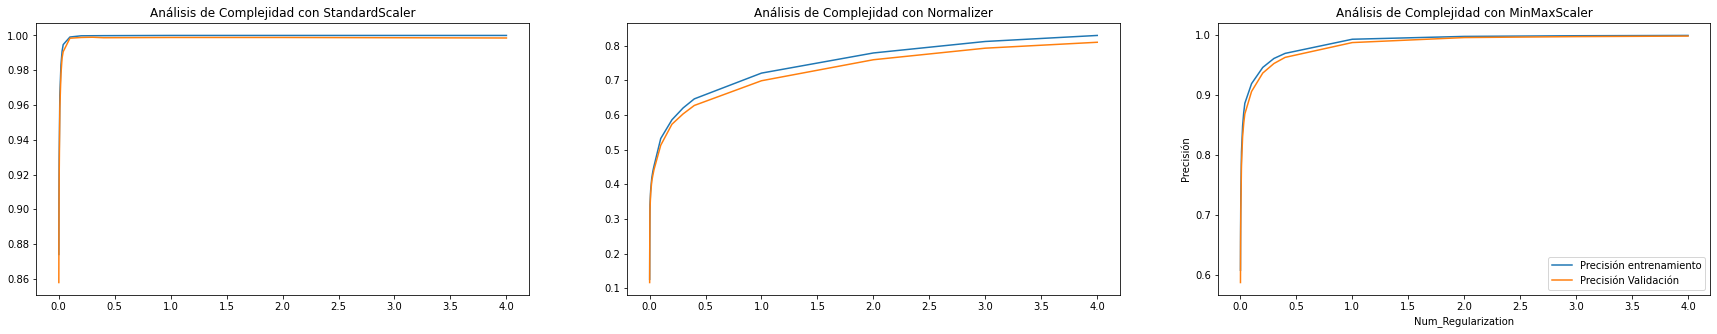

In [ ]:
#@title Análisis de Complejidad:
plt.figure(figsize=(30, 5))
plt.subplot(131)
plt.title("Análisis de Complejidad con StandardScaler")
plt.plot(v_c[1:], training_accuracy_std_aut[1:], label="Precisión entrenamiento")
plt.plot(v_c[1:], valid_accuracy_std_aut[1:], label="Precisión Validación")
plt.legend()

plt.subplot(132)
plt.title("Análisis de Complejidad con Normalizer")
plt.plot(v_c[1:], training_accuracy_norm_aut[1:], label="Precisión entrenamiento")
plt.plot(v_c[1:], valid_accuracy_norm_aut[1:], label="Precisión Validación")
plt.legend()

plt.subplot(133)
plt.title("Análisis de Complejidad con MinMaxScaler")
plt.plot(v_c[1:], training_accuracy_min_aut[1:], label="Precisión entrenamiento")
plt.plot(v_c[1:], valid_accuracy_min_aut[1:], label="Precisión Validación")

plt.ylabel("Precisión")
plt.xlabel("Num_Regularization")
plt.legend()
plt.show()

In [ ]:
#@title Mátrix Confusión, Utilizamos nuestro hiperparametro óptimo de C=1 por los modelos de procesamiento de datos StandarScaler, Normalizer y MinMaxScaler

n_c = 1  ###Tomamos nuestra cantidad de vecinos optimo.

############################StandardScaler###############################
modelo_rlg_std_aut = LogisticRegression(C=n_c)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_rlg_std_aut.fit(Ds_Train_std_pca_aut, Rs_Train)
Rs_pred_Valid_std_aut = modelo_rlg_std_aut.predict(Ds_Valid_std_pca_aut)
Rs_pred_test_std_aut = modelo_rlg_std_aut.predict(Ds_Test_std_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_rlg_std_aut,'modelo_rgl_std')
##########################################################################

############################StandardScaler###############################
modelo_rlg_norm_aut = LogisticRegression(C=n_c)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_rlg_norm_aut.fit(Ds_Train_norm_pca_aut, Rs_Train)
Rs_pred_Valid_norm_aut = modelo_rlg_norm_aut.predict(Ds_Valid_norm_pca_aut)
Rs_pred_test_norm_aut = modelo_rlg_norm_aut.predict(Ds_Test_norm_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_rlg_norm_aut,'modelo_rgl_norm')
##########################################################################

############################StandardScaler###############################
modelo_rlg_min_aut = LogisticRegression(C=n_c)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_rlg_min_aut.fit(Ds_Train_min_pca_aut, Rs_Train)
Rs_pred_Valid_min_aut = modelo_rlg_min_aut.predict(Ds_Valid_min_pca_aut)
Rs_pred_test_min_aut = modelo_rlg_min_aut.predict(Ds_Test_min_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_rlg_min_aut,'modelo_rgl_min')
##########################################################################


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

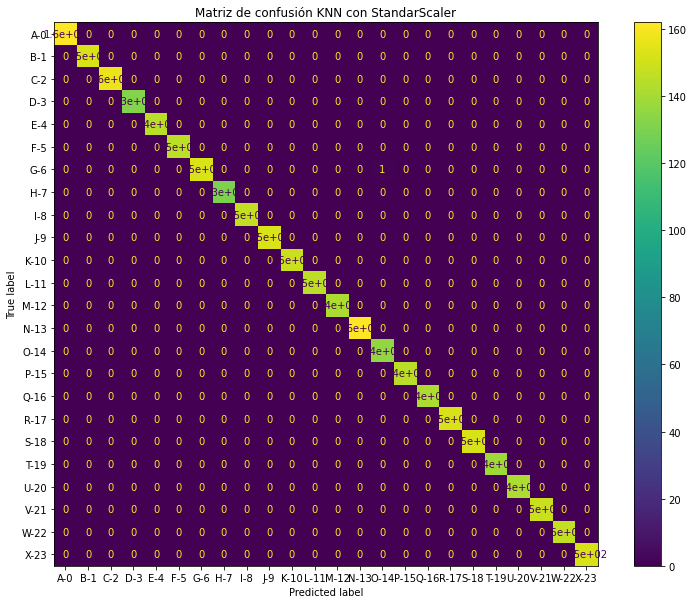

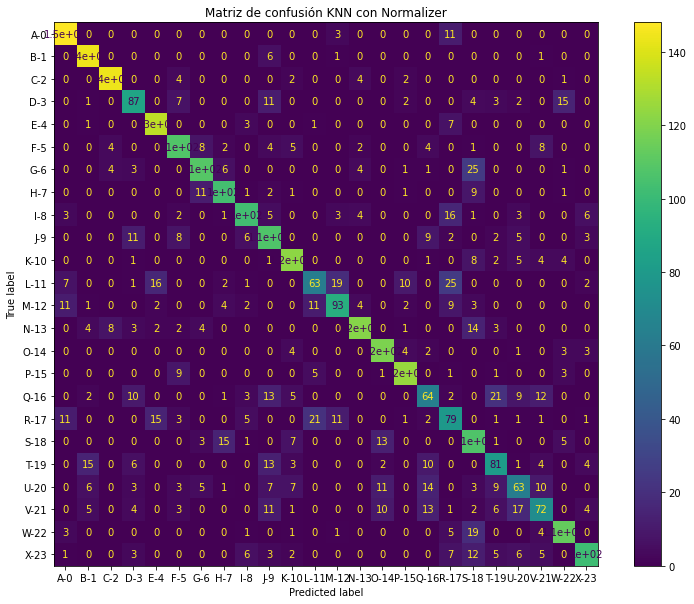

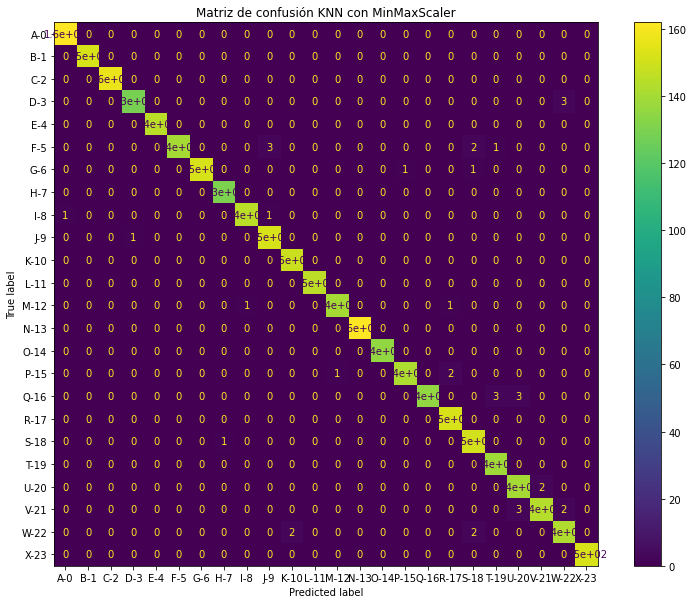

In [ ]:
#@title Generamos la mátrix de confución evaluando nuestras muestras reales Vs los resultados del modelo evaluando el dataset de validación.

###Pintamos la mátrix de confusión:###############
fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_rlg_std_aut, Ds_Test_std_pca_aut, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con StandarScaler')

fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_rlg_norm_aut, Ds_Test_norm_pca_aut, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con Normalizer')

fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_rlg_min_aut, Ds_Test_min_pca_aut, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión KNN con MinMaxScaler')

plt.show()

In [ ]:
#@title Análisis de las métricas de clasificación del modelo:
###Generamos la métricas de la mátrix de confusión:
####Precisión - Recall - Accuracy
pp = precision_score(Rs_Test, Rs_pred_test_std_aut, average='macro')
rc = recall_score(Rs_Test, Rs_pred_test_std_aut, average='macro')
ac = accuracy_score(Rs_Test, Rs_pred_test_std_aut)

pp1 = precision_score(Rs_Test, Rs_pred_test_norm_aut, average='macro')
rc1 = recall_score(Rs_Test, Rs_pred_test_norm_aut, average='macro')
ac1 = accuracy_score(Rs_Test, Rs_pred_test_norm_aut)

pp2 = precision_score(Rs_Test, Rs_pred_test_min_aut, average='macro')
rc2 = recall_score(Rs_Test, Rs_pred_test_min_aut, average='macro')
ac2 = accuracy_score(Rs_Test, Rs_pred_test_min_aut)

subgroup_performance_metrics = {
    'PRECISION': pp, 
    'RECALL': rc,
    'ACCURACY': ac            
}
subgroup_performance_metrics1 = {
    'PRECISION': pp1, 
    'RECALL': rc1,
    'ACCURACY': ac1            
}
subgroup_performance_metrics2 = {
    'PRECISION': pp2, 
    'RECALL': rc2,
    'ACCURACY': ac2
}
performance_df = pd.DataFrame([subgroup_performance_metrics,
                               subgroup_performance_metrics1,
                               subgroup_performance_metrics2],
                              index=["MÉTRICAS Logistic Regression with StandarScaler",
                                     "MÉTRICAS Logistic Regression with Normalizer",
                                     "MÉTRICAS Logistic Regression with MinMaxScaler"])
performance_df

,PRECISION,RECALL,ACCURACY
MÉTRICAS Logistic Regression with StandarScaler,0.999696,0.999729,0.999717
MÉTRICAS Logistic Regression with Normalizer,0.709653,0.709238,0.711010
MÉTRICAS Logistic Regression with MinMaxScaler,0.989615,0.989358,0.989527


### 3. Validación utilizando **Árboles de decisión** para clasificación:


In [ ]:
#@title Se realiza la validación del árbol con todas su ramas puras y el data set sin pres-escalamiento, seteando también solo el hiperparametro n_estimators:

Vr_trees = np.array([5,10,15,30,50,75,100]) 
training_accuracy_tree = [] 
valid_accuracy_tree = []
mejor_c_tree = []
training_accuracy_tree,valid_accuracy_tree,mejor_c_tree = Utilidades.datos_complejidad_3(Vr_trees, Ds_Train, Rs_Train,Ds_Valid, Rs_Valid,None)

print("################################################")
print("Mejor Número de árboles \n", mejor_c_tree)
print("################################################")


####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles 
 [100.           0.99708285]
################################################


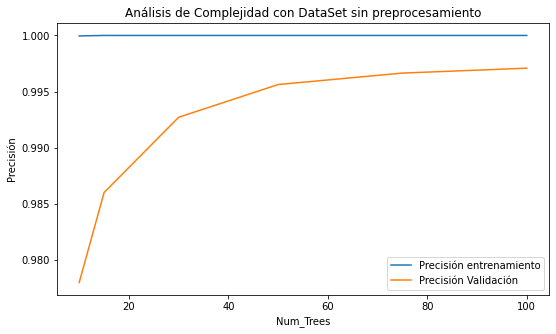

In [ ]:
#@title Análisis de Complejidad:
plt.figure(figsize=(30, 5))
plt.subplot(131)
plt.title("Análisis de Complejidad con DataSet sin preprocesamiento")
plt.plot(Vr_trees[1:], training_accuracy_tree[1:], label="Precisión entrenamiento")
plt.plot(Vr_trees[1:], valid_accuracy_tree[1:], label="Precisión Validación")

plt.ylabel("Precisión")
plt.xlabel("Num_Trees")
plt.legend()
plt.show()

In [ ]:
#@title Mátrix Confusión, Utilizamos nuestro hiperparametro óptimo de número árboles=100 sin parámetro de profundidad:

############################StandardScaler###############################
modelo_tree = RandomForestClassifier(n_estimators=100, random_state=2,max_depth = None)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_tree.fit(Ds_Train, Rs_Train)
Rs_pred_Valid_tree = modelo_tree.predict(Ds_Valid)
Rs_pred_test_tree = modelo_tree.predict(Ds_Test)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_tree,'modelo_tree')
##########################################################################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


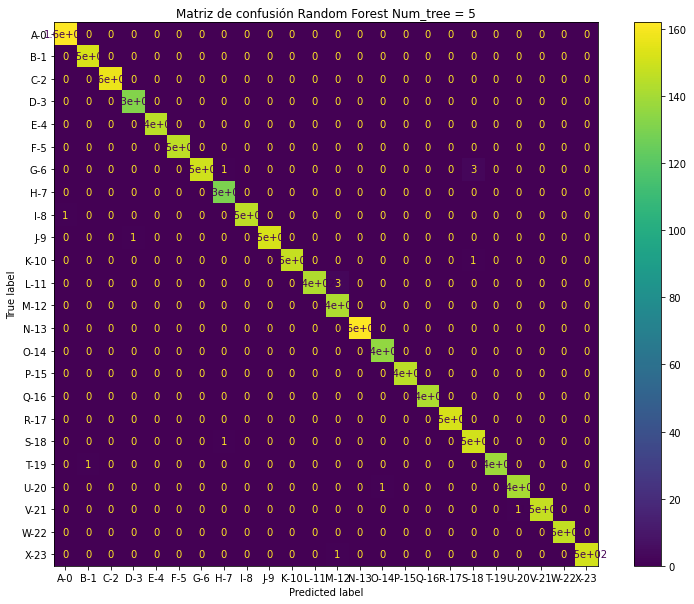

In [ ]:
#@title Generamos la mátrix de confución evaluando nuestras muestras reales Vs los resultados del modelo evaluando el dataset de validación.

###Pintamos la mátrix de confusión:###############
fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_tree, Ds_Test, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión Random Forest Num_tree = 5')

plt.show()

In [ ]:
#@title Análisis de las métricas de clasificación del modelo:
###Generamos la métricas de la mátrix de confusión:
####Precisión - Recall - Accuracy
pp = precision_score(Rs_Test, Rs_pred_test_tree, average='macro')
rc = recall_score(Rs_Test, Rs_pred_test_tree, average='macro')
ac = accuracy_score(Rs_Test, Rs_pred_test_tree)


subgroup_performance_metrics = {
    'PRECISION': pp, 
    'RECALL': rc,
    'ACCURACY': ac            
}
performance_df = pd.DataFrame([subgroup_performance_metrics],
                              index=["MÉTRICAS Randome Forest with Original DataSet"])
performance_df

,PRECISION,RECALL,ACCURACY
MÉTRICAS Randome Forest with Original DataSet,0.995713,0.995805,0.995754


In [ ]:
#@title Se realiza la validación del árbol con todas su ramas puras y el data set sin pres-escalamiento seteando también los hiperparametros n_estimators y max_depth:

Vr_trees = np.array([0,5,10,15,30,50,75,100]) 
Vr_depth = np.array([5,10,15,30,50,75,100]) 
global_training = []
global_test = []
global_best = []
for i in Vr_depth:
  training_accuracy_tree = [] 
  valid_accuracy_tree = []
  mejor_c_tree = []
  training_accuracy_tree,valid_accuracy_tree,mejor_c_tree = Utilidades.datos_complejidad_3(Vr_trees, Ds_Train, Rs_Train,Ds_Valid, Rs_Valid,i)
  global_training.append(training_accuracy_tree)
  global_test.append(valid_accuracy_tree)
  global_best.append(mejor_c_tree)
  print("################################################")
  print("Mejor Número de árboles \n", mejor_c_tree, "Con Profundidad", i)
  print("################################################")


####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles 
 [75.          0.58372229] Con Profundidad 5
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles 
 [100.           0.96222287] Con Profundidad 10
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles 
 [100.           0.99504084] Con Profundidad 15
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles 
 [100.           0.99679113] Con Profundidad 30
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles 
 [100.           0.99708285] Con Profundidad 50
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles 
 [100.           0.99708285] Con Profundidad 75
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles 
 [100.           0.99708285] Con Profundidad 100
################################################


In [ ]:
#@title Resultados
iterador = 0
mejor = 0
Pos = 0
for i in global_best :
  if i[1] > mejor :
    mejor = i[1]
    Pos = iterador
  iterador = iterador + 1  
print("Mejor puntaje, Total Arboles = ",global_best[Pos][0], " y profundidad = ",Vr_depth[Pos], "Puntaje obtenido = ",global_best[Pos][1] )


Mejor puntaje, Total Arboles =  100.0  y profundidad =  50 Puntaje obtenido =  0.9970828471411902


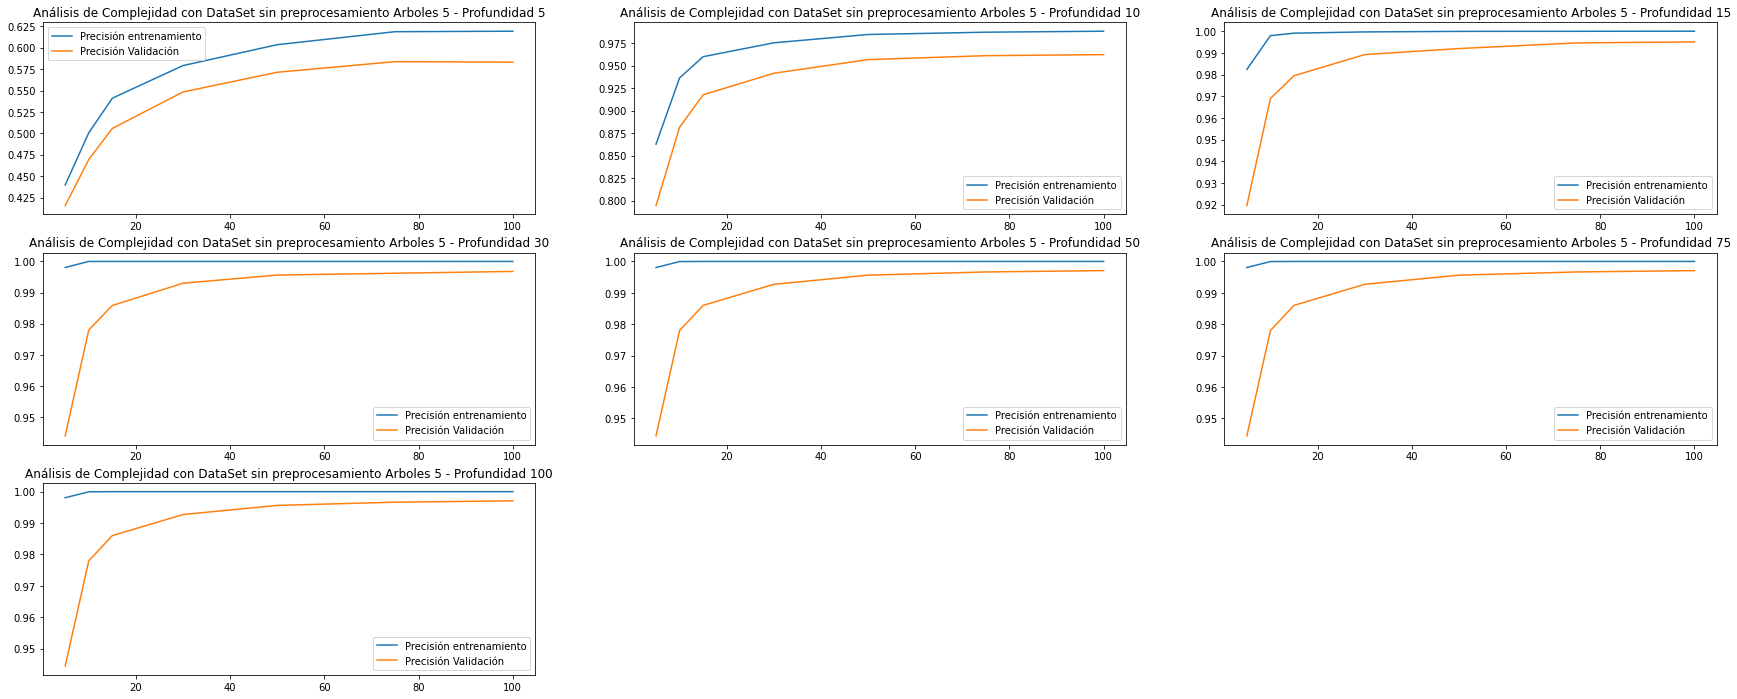

In [ ]:
#@title Análisis de Complejidad:
plt.figure(figsize=(30, 12))
iterador=1
pos=0
for i in Vr_depth:
  position = 330 + iterador
  #print(position)
  plt.subplot(position)
  plt.title("Análisis de Complejidad con DataSet sin preprocesamiento Arboles 5 - Profundidad {}".format(Vr_depth[pos]))
  plt.plot(Vr_depth, global_training[pos][1:], label="Precisión entrenamiento")
  plt.plot(Vr_depth, global_test[pos][1:], label="Precisión Validación")
  pos = pos + 1
  iterador = iterador + 1
  plt.legend()
plt.show()

In [ ]:
#@title Mátrix Confusión, Utilizamos nuestro hiperparametro óptimo de número árboles=100 y parámetro de profundidad = 50:

############################StandardScaler###############################
modelo_tree = RandomForestClassifier(n_estimators=100, random_state=2,max_depth = 50)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_tree.fit(Ds_Train, Rs_Train)
Rs_pred_Valid_tree = modelo_tree.predict(Ds_Valid)
Rs_pred_test_tree = modelo_tree.predict(Ds_Test)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_tree,'modelo_tree_2')
##########################################################################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


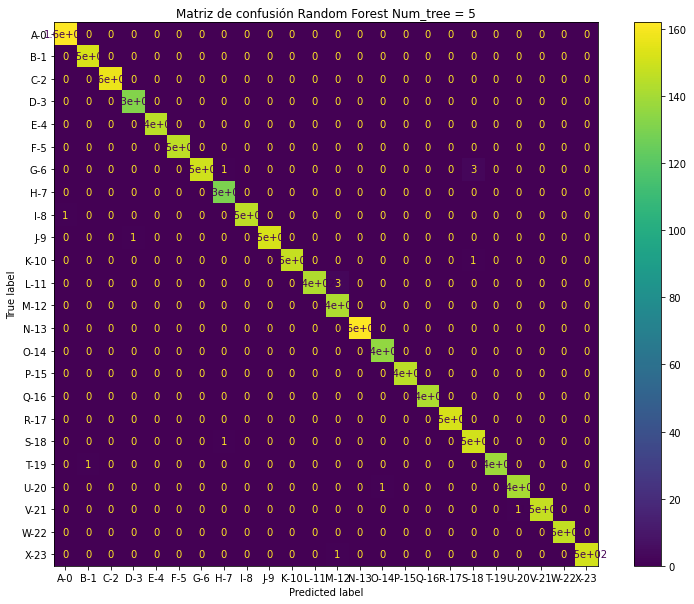

In [ ]:
#@title Generamos la mátrix de confución evaluando nuestras muestras reales Vs los resultados del modelo evaluando el dataset de validación.

###Pintamos la mátrix de confusión:###############
fig, ax = plt.subplots(figsize=(13, 10))
x=plot_confusion_matrix(modelo_tree, Ds_Test, Rs_Test,display_labels=Target_name, ax=ax) 
x.ax_.set_title('Matriz de confusión Random Forest Num_tree = 5')

plt.show()

In [ ]:
#@title Análisis de las métricas de clasificación del modelo:
###Generamos la métricas de la mátrix de confusión:
####Precisión - Recall - Accuracy
pp = precision_score(Rs_Test, Rs_pred_test_tree, average='macro')
rc = recall_score(Rs_Test, Rs_pred_test_tree, average='macro')
ac = accuracy_score(Rs_Test, Rs_pred_test_tree)

subgroup_performance_metrics = {
    'PRECISION': pp, 
    'RECALL': rc,
    'ACCURACY': ac            
}
performance_df = pd.DataFrame([subgroup_performance_metrics],
                              index=["MÉTRICAS Randome Forest with Original DataSet"])
performance_df

,PRECISION,RECALL,ACCURACY
MÉTRICAS Randome Forest with Original DataSet,0.995713,0.995805,0.995754


In [ ]:
#@title Análisis de Complejidad Standard, se realiza el análisis de complejidad con los modelos de procesamiento de datos StandarScaler, Normalizer y MiMaxScaler  utilizando PCA con los componentes generados con lasso y la distribucción del 95%

Vr_trees = np.array([0,5,10,15,30,50,75,100]) 
Vr_depth = np.array([5,10,15,30,50,75,100]) 
global_training_std = []
global_test_std = []
global_best_std = []
for i in Vr_depth:
  training_accuracy_tree = [] 
  valid_accuracy_tree = []
  mejor_c_tree = []
  training_accuracy_tree,valid_accuracy_tree,mejor_c_tree = Utilidades.datos_complejidad_3(Vr_trees, Ds_Train_std_pca, Rs_Train,Ds_Valid_std_pca, Rs_Valid,i)
  global_training_std.append(training_accuracy_tree)
  global_test_std.append(valid_accuracy_tree)
  global_best_std.append(mejor_c_tree)
  print("################################################")
  print("Mejor Número de árboles Standard \n", mejor_c_tree, "Con Profundidad", i)
  print("################################################")

global_training_std_aut = []
global_test_std_aut = []
global_best_std_aut = []
for i in Vr_depth:
  training_accuracy_tree = [] 
  valid_accuracy_tree = []
  mejor_c_tree = []
  training_accuracy_tree,valid_accuracy_tree,mejor_c_tree = Utilidades.datos_complejidad_3(Vr_trees, Ds_Train_std_pca_aut, Rs_Train,Ds_Valid_std_pca_aut, Rs_Valid,i)
  global_training_std_aut.append(training_accuracy_tree)
  global_test_std_aut.append(valid_accuracy_tree)
  global_best_std_aut.append(mejor_c_tree)
  print("################################################")
  print("Mejor Número de árboles Standard 2 \n", mejor_c_tree, "Con Profundidad", i)
  print("################################################")


####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 
 [100.           0.84203617] Con Profundidad 5
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 
 [75.          0.99941657] Con Profundidad 10
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 
 [30.  1.] Con Profundidad 15
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 
 [30.  1.] Con Profundidad 30
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 
 [30.  1.] Con Profundidad 50
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 
 [30.  1.] Con Profundidad 75
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 
 [30.  1.] Con Profundidad 100
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 2 
 [100.           0.79127771] Con Profundidad 5
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 2 
 [100.           0.99912485] Con Profundidad 10
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 2 
 [15.  1.] Con Profundidad 15
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 2 
 [30.  1.] Con Profundidad 30
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 2 
 [30.  1.] Con Profundidad 50
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 2 
 [30.  1.] Con Profundidad 75
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Standard 2 
 [30.  1.] Con Profundidad 100
################################################


In [ ]:
#@title Análisis de Complejidad Normalizer
global_training_norm = []
global_test_norm = []
global_best_norm = []
for i in Vr_depth:
  training_accuracy_tree = [] 
  valid_accuracy_tree = []
  mejor_c_tree = []
  training_accuracy_tree,valid_accuracy_tree,mejor_c_tree = Utilidades.datos_complejidad_3(Vr_trees, Ds_Train_norm_pca, Rs_Train,Ds_Valid_norm_pca, Rs_Valid,i)
  global_training_norm.append(training_accuracy_tree)
  global_test_norm.append(valid_accuracy_tree)
  global_best_norm.append(mejor_c_tree)
  print("################################################")
  print("Mejor Número de árboles Normalizer \n", mejor_c_tree, "Con Profundidad", i)
  print("################################################")  

global_training_norm_aut = []
global_test_norm_aut = []
global_best_norm_aut = []
for i in Vr_depth:
  training_accuracy_tree = [] 
  valid_accuracy_tree = []
  mejor_c_tree = []
  training_accuracy_tree,valid_accuracy_tree,mejor_c_tree = Utilidades.datos_complejidad_3(Vr_trees, Ds_Train_norm_pca_aut, Rs_Train,Ds_Valid_norm_pca_aut, Rs_Valid,i)
  global_training_norm_aut.append(training_accuracy_tree)
  global_test_norm_aut.append(valid_accuracy_tree)
  global_best_norm_aut.append(mejor_c_tree)
  print("################################################")
  print("Mejor Número de árboles Normalizer 2 \n", mejor_c_tree, "Con Profundidad", i)
  print("################################################")  



####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 [100.           0.79259043] Con Profundidad 5
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 [100.           0.99985414] Con Profundidad 10
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 [30.  1.] Con Profundidad 15
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 [30.  1.] Con Profundidad 30
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 [30.  1.] Con Profundidad 50
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 [30.  1.] Con Profundidad 75
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 [30.  1.] Con Profundidad 100
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 2 
 [100.           0.77640023] Con Profundidad 5
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 2 
 [100.           0.99956243] Con Profundidad 10
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 2 
 [15.  1.] Con Profundidad 15
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 2 
 [30.  1.] Con Profundidad 30
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 2 
 [30.  1.] Con Profundidad 50
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 2 
 [30.  1.] Con Profundidad 75
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 2 
 [30.  1.] Con Profundidad 100
################################################


In [ ]:
#@title Análisis de Complejidad MinMaxScaler
global_training_min = []
global_test_min = []
global_best_min = []
for i in Vr_depth:
  training_accuracy_tree = [] 
  valid_accuracy_tree = []
  mejor_c_tree = []
  training_accuracy_tree,valid_accuracy_tree,mejor_c_tree = Utilidades.datos_complejidad_3(Vr_trees, Ds_Train_min_pca, Rs_Train,Ds_Valid_min_pca, Rs_Valid,i)
  global_training_min.append(training_accuracy_tree)
  global_test_min.append(valid_accuracy_tree)
  global_best_min.append(mejor_c_tree)
  print("################################################")
  print("Mejor Número de árboles MinMaxScaler \n", mejor_c_tree, "Con Profundidad", i)
  print("################################################")  

global_training_min_aut = []
global_test_min_aut = []
global_best_min_aut = []
for i in Vr_depth:
  training_accuracy_tree = [] 
  valid_accuracy_tree = []
  mejor_c_tree = []
  training_accuracy_tree,valid_accuracy_tree,mejor_c_tree = Utilidades.datos_complejidad_3(Vr_trees, Ds_Train_min_pca_aut, Rs_Train,Ds_Valid_min_pca_aut, Rs_Valid,i)
  global_training_min_aut.append(training_accuracy_tree)
  global_test_min_aut.append(valid_accuracy_tree)
  global_best_min_aut.append(mejor_c_tree)
  print("################################################")
  print("Mejor Número de árboles MinMaxScaler 2 \n", mejor_c_tree, "Con Profundidad", i)
  print("################################################")  

####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 <class 'sklearn.preprocessing._data.MinMaxScaler'> Con Profundidad 5
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 <class 'sklearn.preprocessing._data.MinMaxScaler'> Con Profundidad 10
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 <class 'sklearn.preprocessing._data.MinMaxScaler'> Con Profundidad 15
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 <class 'sklearn.preprocessing._data.MinMaxScaler'> Con Profundidad 30
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 <class 'sklearn.preprocessing._data.MinMaxScaler'> Con Profundidad 50
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 <class 'sklearn.preprocessing._data.MinMaxScaler'> Con Profundidad 75
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles Normalizer 
 <class 'sklearn.preprocessing._data.MinMaxScaler'> Con Profundidad 100
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles MinMaxScaler 2 
 [100.           0.78252625] Con Profundidad 5
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles MinMaxScaler 2 
 [75.          0.99956243] Con Profundidad 10
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles MinMaxScaler 2 
 [30.  1.] Con Profundidad 15
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles MinMaxScaler 2 
 [10.  1.] Con Profundidad 30
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles MinMaxScaler 2 
 [10.  1.] Con Profundidad 50
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles MinMaxScaler 2 
 [10.  1.] Con Profundidad 75
################################################
####################################  0
####################################  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


####################################  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


################################################
Mejor Número de árboles MinMaxScaler 2 
 [10.  1.] Con Profundidad 100
################################################


In [ ]:
#@title Resultados

def val_result (vector,nombre):
  iterador = 0
  mejor = 0
  Pos = 0
  for i in vector :
    if i[1] > mejor :
      mejor = i[1]
      Pos = iterador
    iterador = iterador + 1  
  print(nombre,", Total Arboles = ",vector[Pos][0], " y profundidad = ",Vr_depth[Pos], "Puntaje obtenido = ",vector[Pos][1] )  

val_result (global_best_std,"Mejor puntaje Standard")
val_result (global_best_std_aut,"Mejor puntaje Standard 2")
print("##################################################################")
val_result (global_best_norm,"Mejor puntaje Normalizer")
val_result (global_best_norm_aut,"Mejor puntaje Normalizer 2")
print("##################################################################")
val_result (global_best_min,"Mejor puntaje MinMaxScaler")
val_result (global_best_min_aut,"Mejor puntaje MinMaxScaler 2")

Mejor puntaje Standard , Total Arboles =  30.0  y profundidad =  15 Puntaje obtenido =  1.0
Mejor puntaje Standard 2 , Total Arboles =  15.0  y profundidad =  15 Puntaje obtenido =  1.0
##################################################################
Mejor puntaje Normalizer , Total Arboles =  30.0  y profundidad =  15 Puntaje obtenido =  1.0
Mejor puntaje Normalizer 2 , Total Arboles =  15.0  y profundidad =  15 Puntaje obtenido =  1.0
##################################################################
Mejor puntaje MinMaxScaler , Total Arboles =  75.0  y profundidad =  10 Puntaje obtenido =  1.0
Mejor puntaje MinMaxScaler 2 , Total Arboles =  30.0  y profundidad =  15 Puntaje obtenido =  1.0


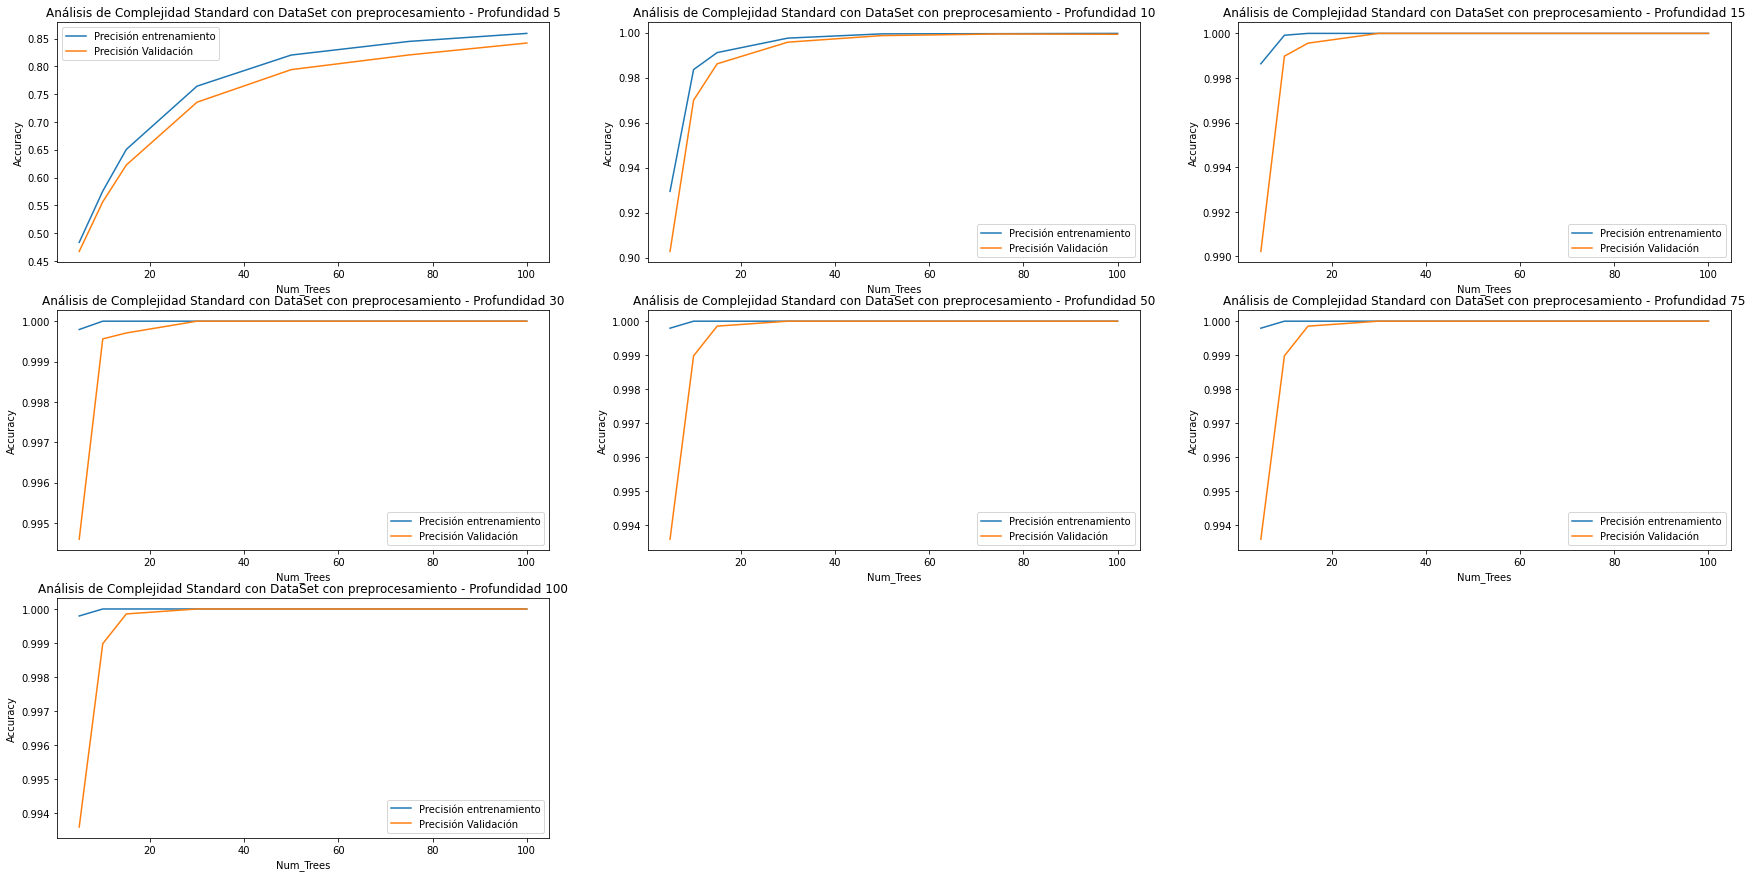

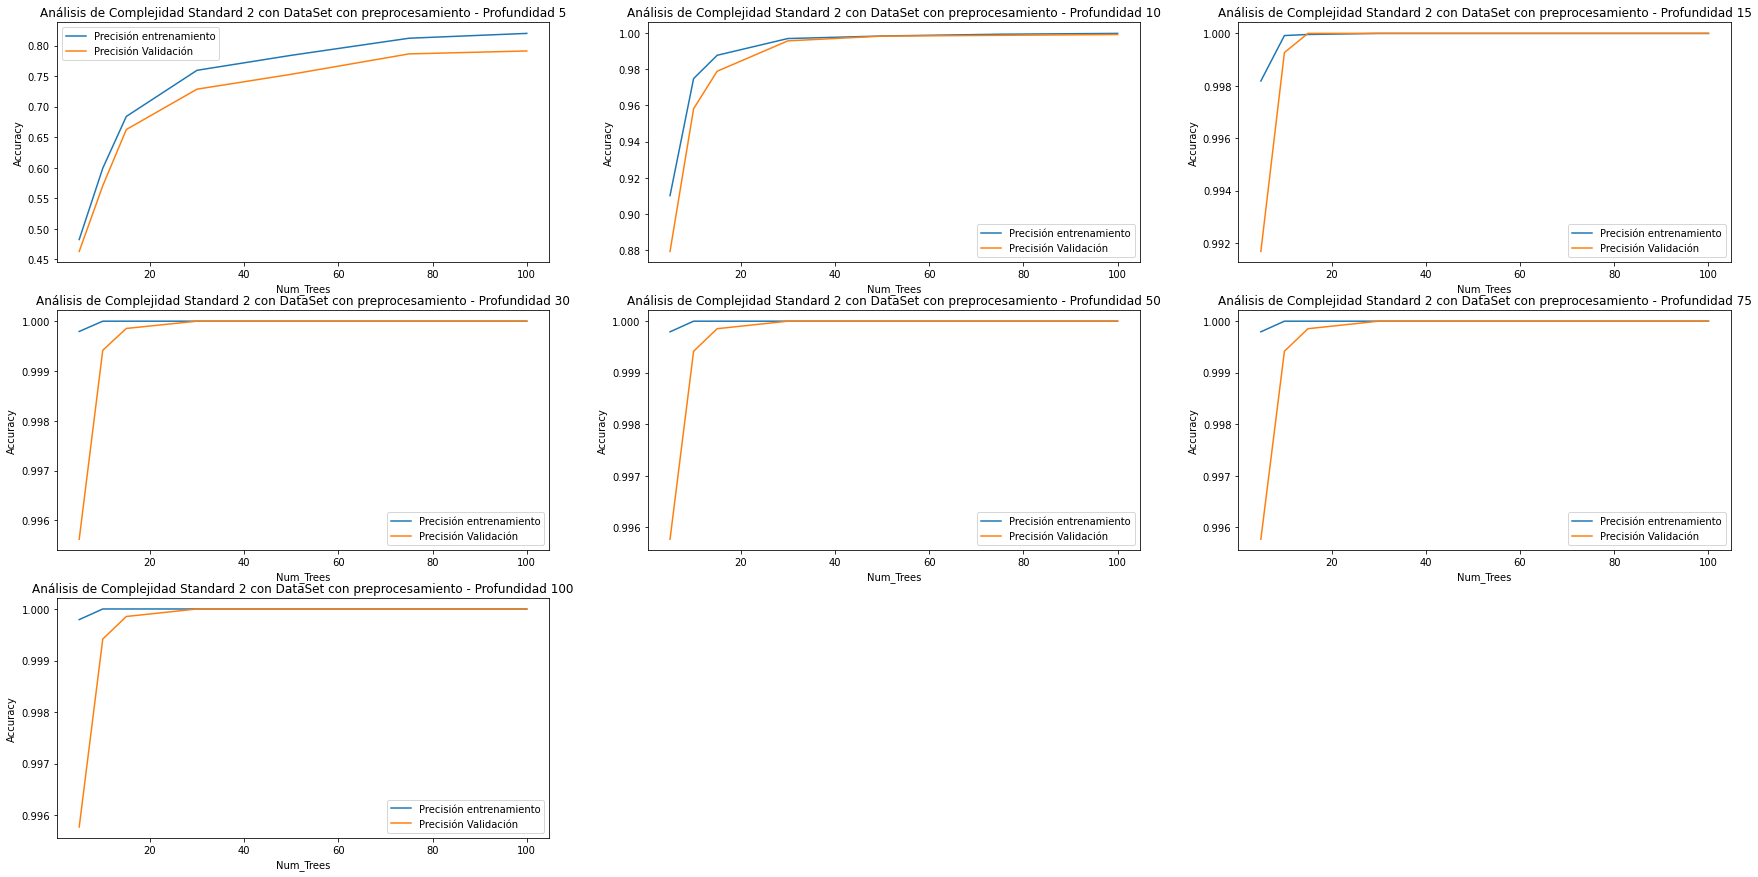

In [ ]:
#@title Análisis de Complejidad Standard:
def grafica_complejidad (vector, vector2, Nombre):
  plt.figure(figsize=(30, 15))
  iterador=1
  pos=0
  for i in Vr_depth:
    position = 330 + iterador
    #print(position)
    plt.subplot(position)
    plt.title("Análisis de Complejidad " + Nombre +" con DataSet con preprocesamiento - Profundidad {}".format(Vr_depth[pos]))
    plt.plot(Vr_depth, vector[pos][1:], label="Precisión entrenamiento")
    plt.plot(Vr_depth, vector2[pos][1:], label="Precisión Validación")
    pos = pos + 1
    iterador = iterador + 1
    plt.legend()
    plt.xlabel("Num_Trees")
    plt.ylabel("Accuracy")
  plt.show()

grafica_complejidad (global_training_std, global_test_std, "Standard")
grafica_complejidad (global_training_std_aut, global_test_std_aut, "Standard 2")



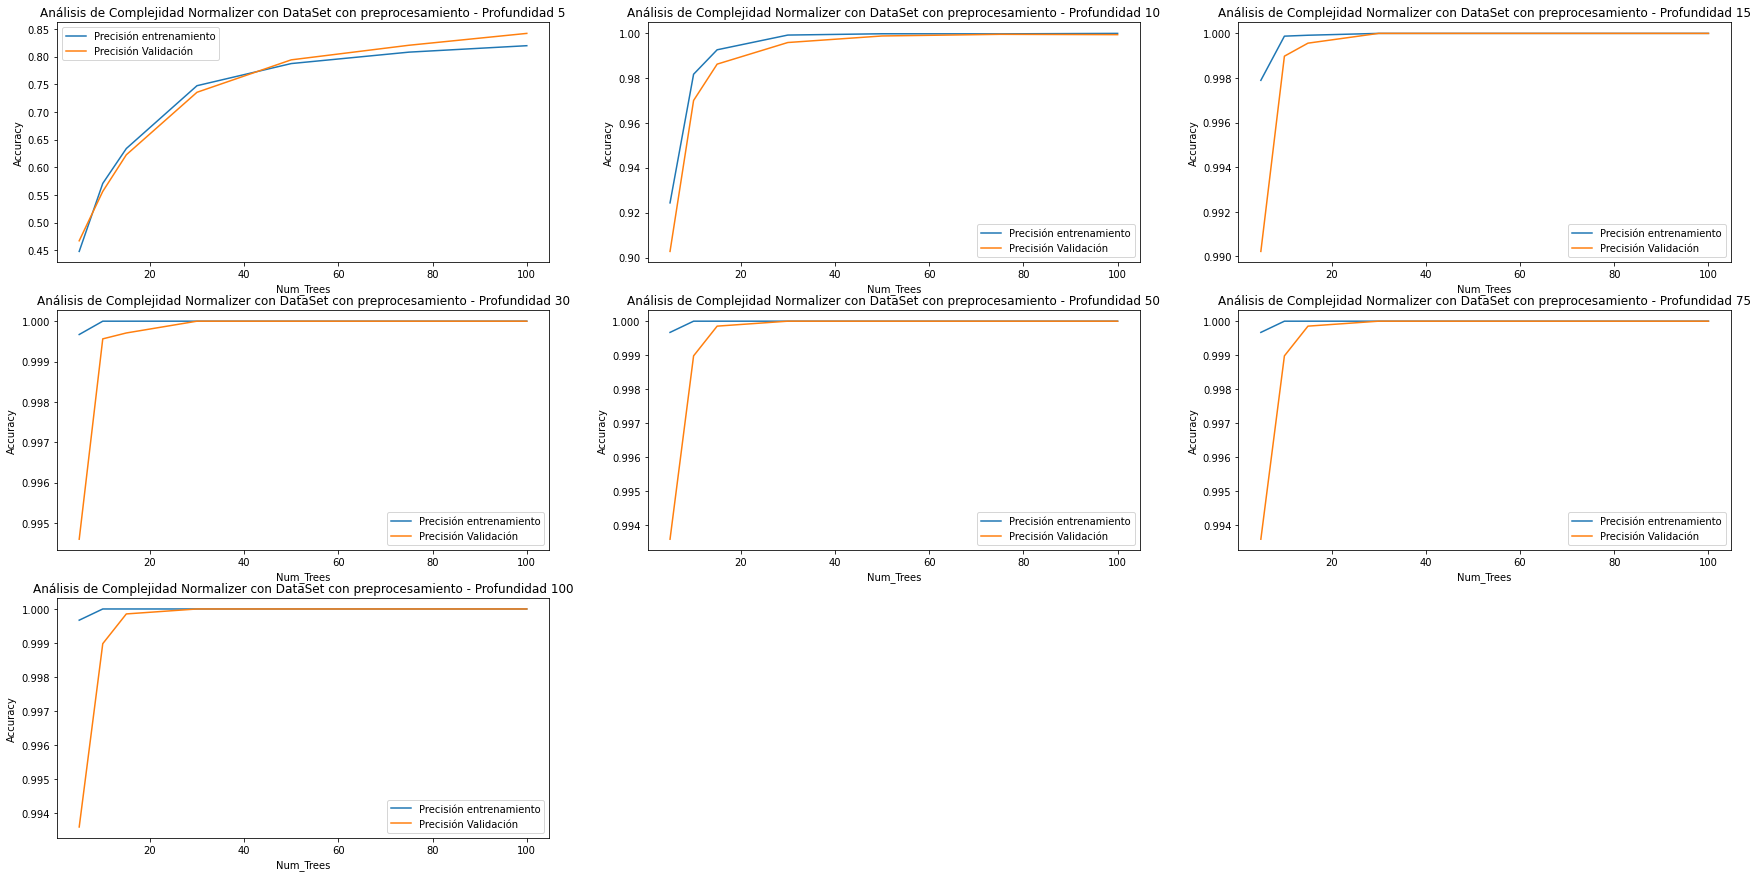

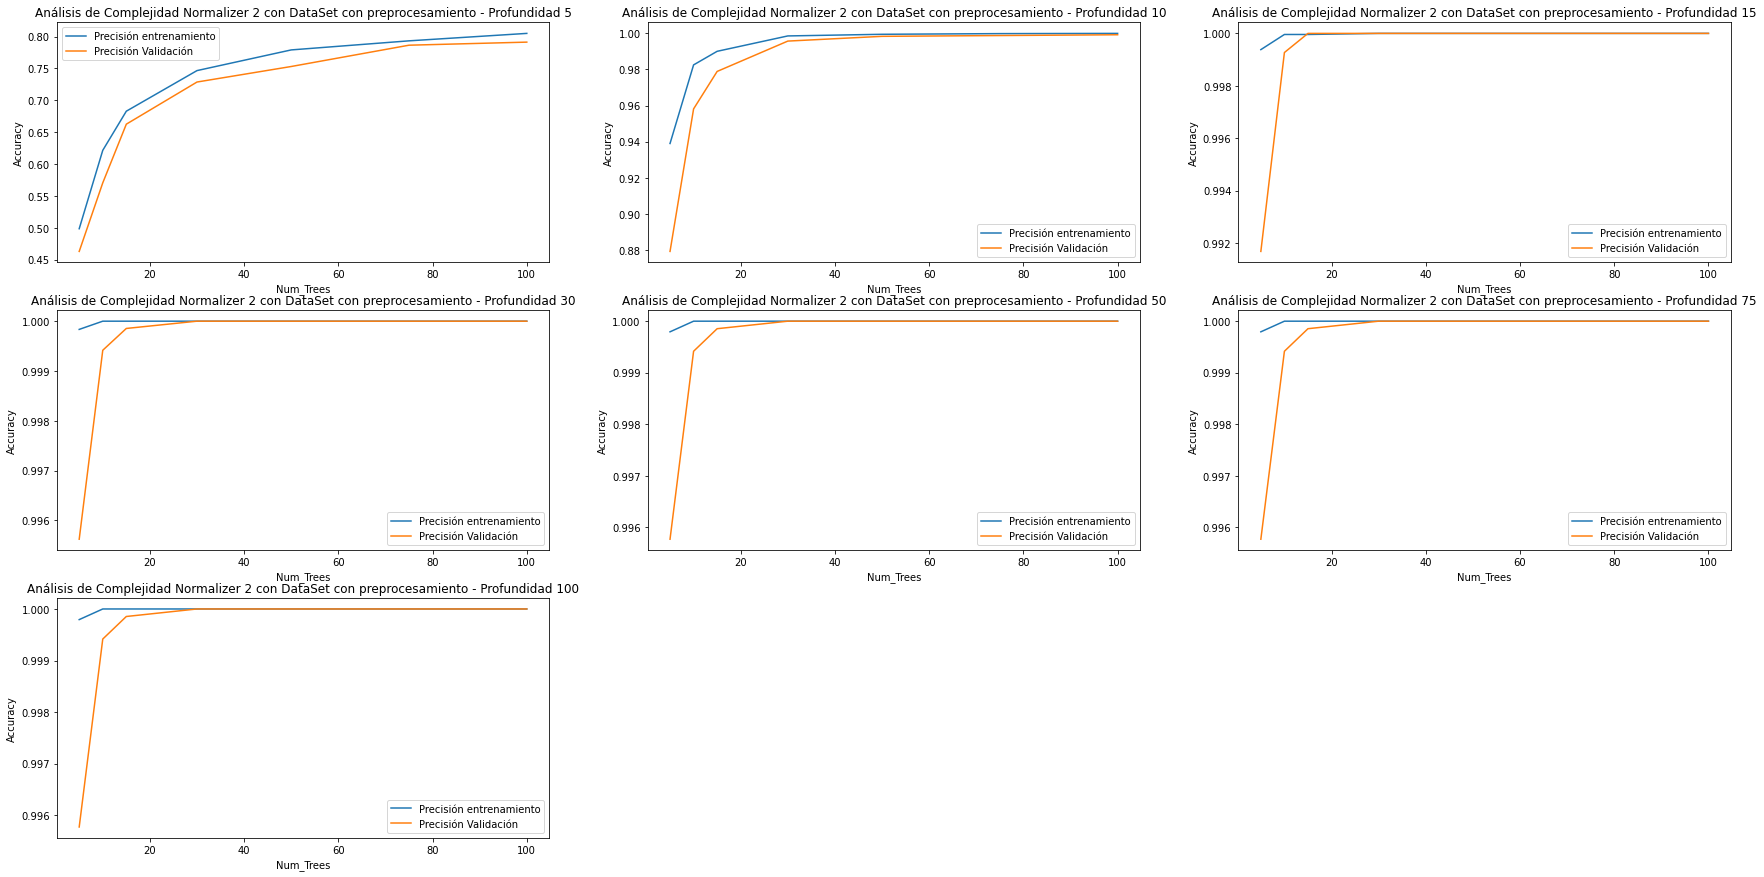

In [ ]:
#@title Análisis de Complejidad Normalizer:

grafica_complejidad (global_training_norm, global_test_std, "Normalizer")
grafica_complejidad (global_training_norm_aut, global_test_std_aut, "Normalizer 2")



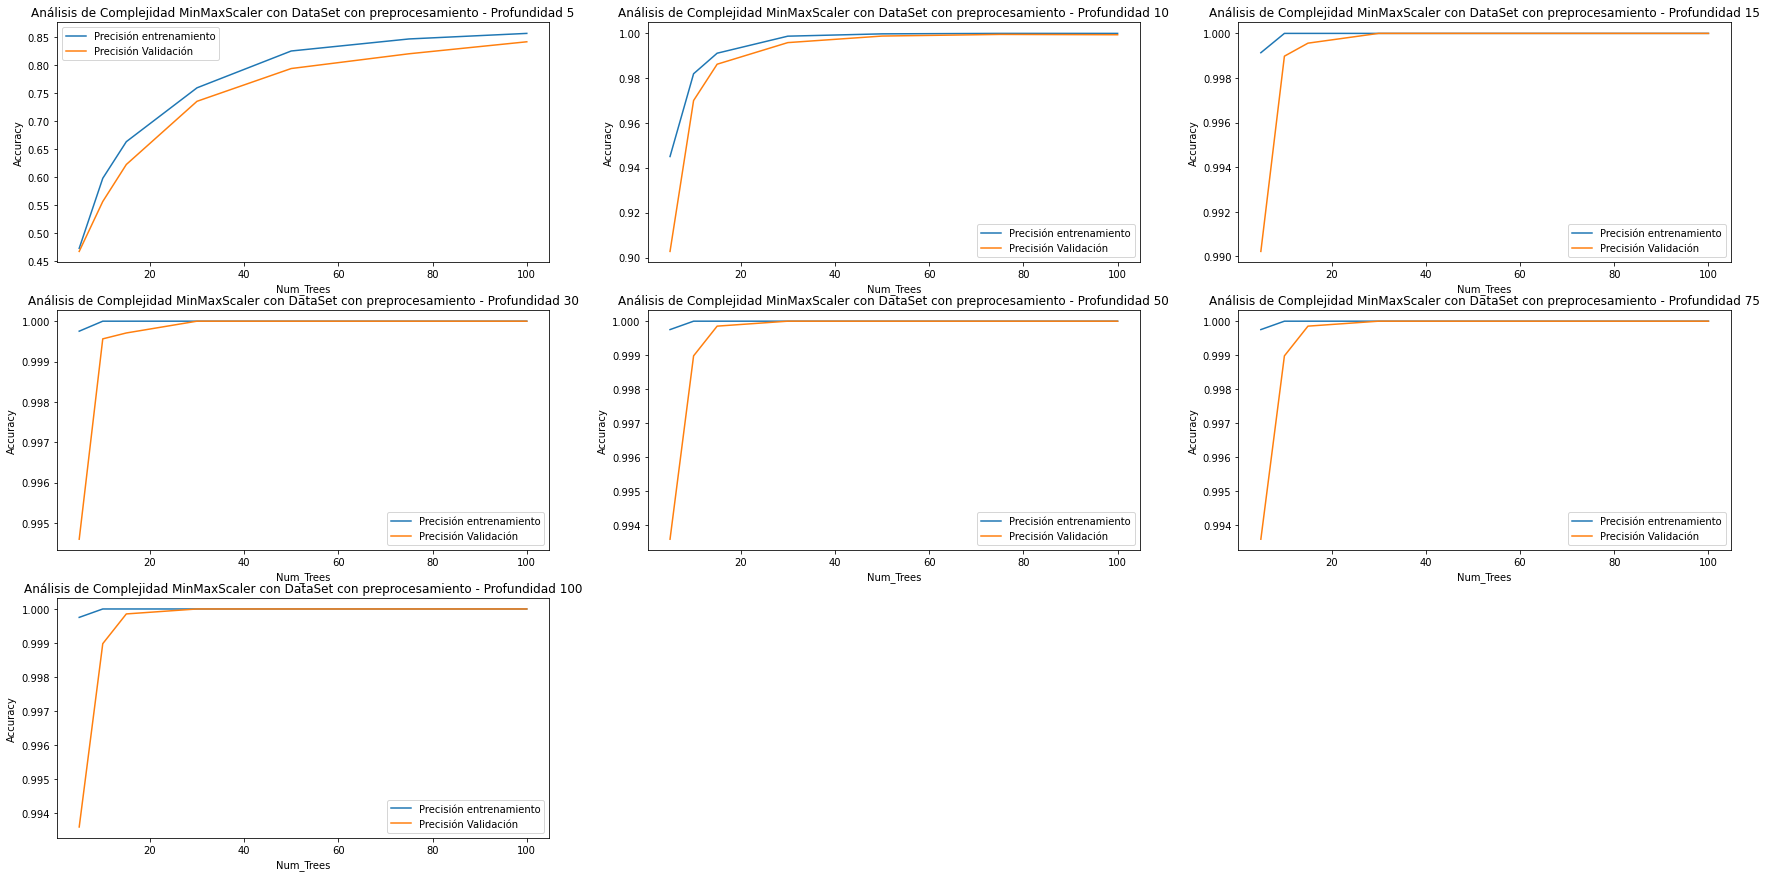

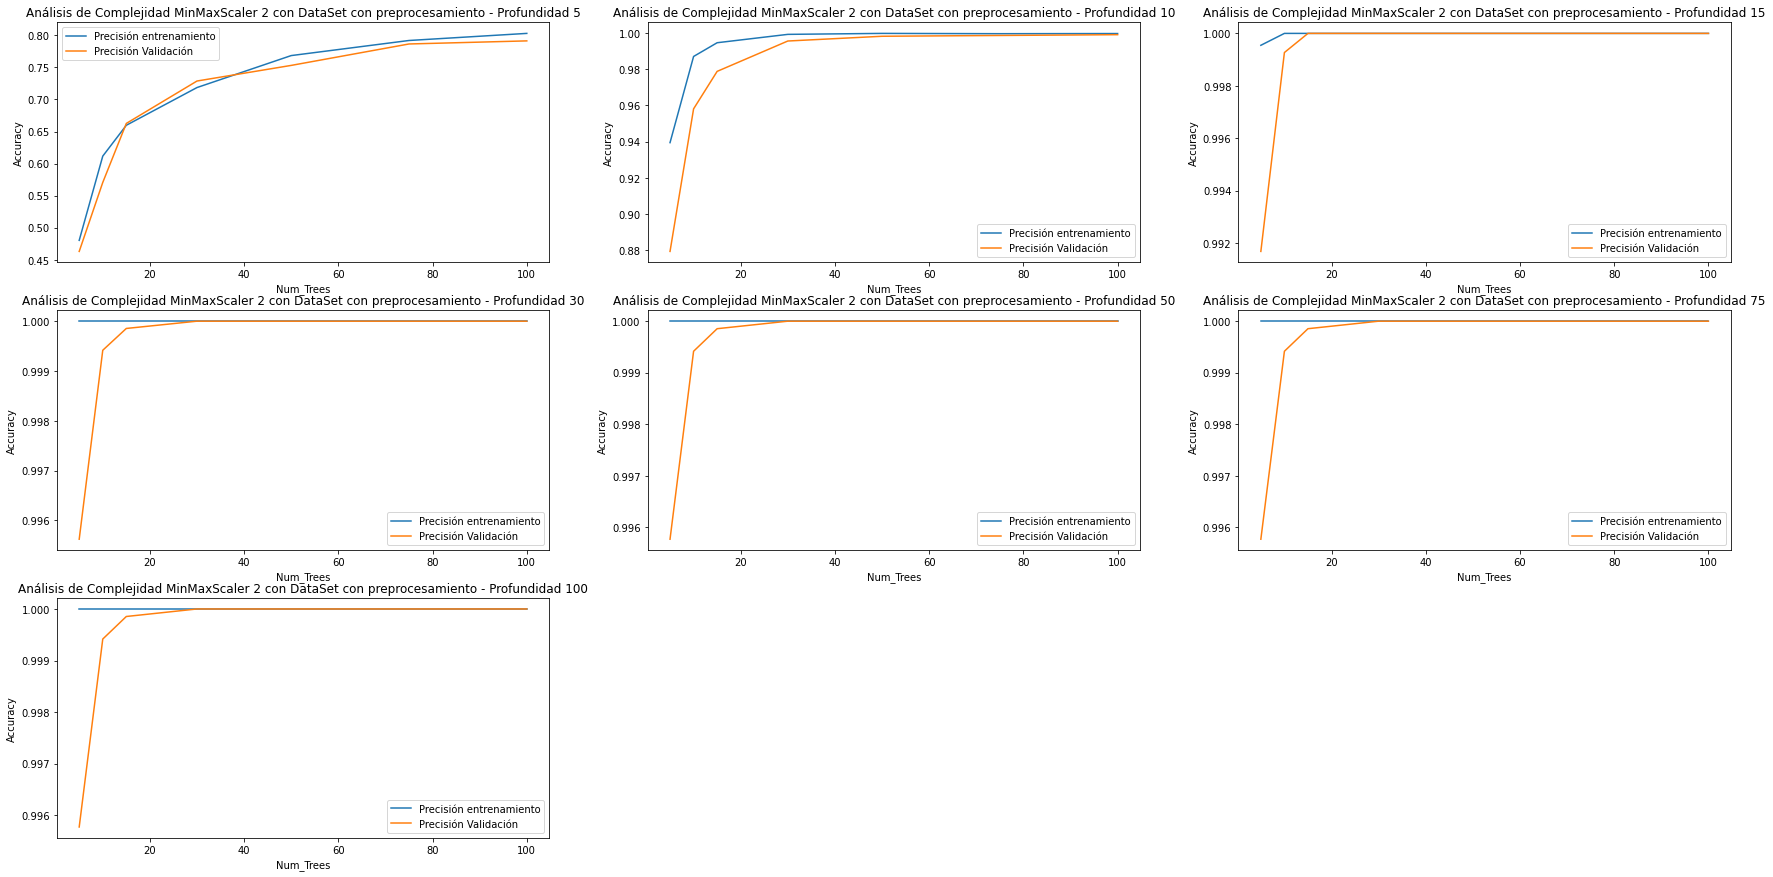

In [ ]:
#@title Análisis de Complejidad MinMaxScaler:

grafica_complejidad (global_training_min, global_test_std, "MinMaxScaler")
grafica_complejidad (global_training_min_aut, global_test_std_aut, "MinMaxScaler 2")



In [ ]:
#@title Standard, Utilizamos nuestros hiperparametros óptimo de número:

############################StandardScaler###############################
modelo_tree_std = RandomForestClassifier(n_estimators=30, random_state=2,max_depth = 15)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_tree_std.fit(Ds_Train_std_pca, Rs_Train)
Rs_pred_Valid_tree_std = modelo_tree_std.predict(Ds_Valid_std_pca)
Rs_pred_test_tree_std = modelo_tree_std.predict(Ds_Test_std_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_tree_std,'modelo_tree_std')
##########################################################################

############################StandardScaler 2###############################
modelo_tree_std_aut = RandomForestClassifier(n_estimators=15, random_state=2,max_depth = 15)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_tree_std_aut.fit(Ds_Train_std_pca_aut, Rs_Train)
Rs_pred_Valid_tree_std_aut = modelo_tree_std_aut.predict(Ds_Valid_std_pca_aut)
Rs_pred_test_tree_std_aut = modelo_tree_std_aut.predict(Ds_Test_std_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_tree_min_aut,'modelo_tree_min_aut')
##########################################################################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
#@title Normalizer, Utilizamos nuestros hiperparametros óptimo de número:

############################Normalizer###############################
modelo_tree_norm = RandomForestClassifier(n_estimators=30, random_state=2,max_depth = 15)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_tree_norm.fit(Ds_Train_norm_pca, Rs_Train)
Rs_pred_Valid_tree_norm = modelo_tree_norm.predict(Ds_Valid_norm_pca)
Rs_pred_test_tree_norm = modelo_tree_norm.predict(Ds_Test_norm_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_tree_norm,'modelo_tree_min')
##########################################################################

############################StandardScaler 2###############################
modelo_tree_norm_aut = RandomForestClassifier(n_estimators=15, random_state=2,max_depth = 15)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_tree_norm_aut.fit(Ds_Train_norm_pca_aut, Rs_Train)
Rs_pred_Valid_tree_norm_aut = modelo_tree_norm_aut.predict(Ds_Valid_norm_pca_aut)
Rs_pred_test_tree_norm_aut = modelo_tree_norm_aut.predict(Ds_Test_norm_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_tree_norm_aut,'modelo_tree_norm_aut')
##########################################################################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
#@title Normalizer, Utilizamos nuestros hiperparametros óptimo de número:

############################MinMaxScaler###############################
modelo_tree_min = RandomForestClassifier(n_estimators=75, random_state=2,max_depth = 10)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_tree_min.fit(Ds_Train_min_pca, Rs_Train)
Rs_pred_Valid_tree_min = modelo_tree_min.predict(Ds_Valid_min_pca)
Rs_pred_test_tree_min = modelo_tree_min.predict(Ds_Test_min_pca)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_tree_min,'modelo_tree_min')
##########################################################################

############################StandardScaler 2###############################
modelo_tree_min_aut = RandomForestClassifier(n_estimators=30, random_state=2,max_depth = 15)
###Entrenamos el modelo con el hiperparametro óptimo:
modelo_tree_min_aut.fit(Ds_Train_min_pca_aut, Rs_Train)
Rs_pred_Valid_tree_min_aut = modelo_tree_min_aut.predict(Ds_Valid_min_pca_aut)
Rs_pred_test_tree_min_aut = modelo_tree_min_aut.predict(Ds_Test_min_pca_aut)

#Se almacena el modelo
Utilidades.save_hdisk(modelo_tree_min_aut,'modelo_tree_min_aut')
##########################################################################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
#@title Análisis de las métricas de clasificación del modelo utilizando lasso:
###Generamos la métricas de la mátrix de confusión:
####Precisión - Recall - Accuracy
pp = precision_score(Rs_Test, Rs_pred_test_tree_std, average='macro')
rc = recall_score(Rs_Test, Rs_pred_test_tree_std, average='macro')
ac = accuracy_score(Rs_Test, Rs_pred_test_tree_std)

pp1 = precision_score(Rs_Test, Rs_pred_test_tree_norm, average='macro')
rc1 = recall_score(Rs_Test, Rs_pred_test_tree_norm, average='macro')
ac1 = accuracy_score(Rs_Test, Rs_pred_test_tree_norm)

pp2 = precision_score(Rs_Test, Rs_pred_test_tree_min, average='macro')
rc2 = recall_score(Rs_Test, Rs_pred_test_tree_min, average='macro')
ac2 = accuracy_score(Rs_Test, Rs_pred_test_tree_min)

subgroup_performance_metrics = {
    'PRECISION': pp, 
    'RECALL': rc,
    'ACCURACY': ac            
}
subgroup_performance_metrics1 = {
    'PRECISION': pp1, 
    'RECALL': rc1,
    'ACCURACY': ac1            
}
subgroup_performance_metrics2 = {
    'PRECISION': pp2, 
    'RECALL': rc2,
    'ACCURACY': ac2
}
performance_df = pd.DataFrame([subgroup_performance_metrics, subgroup_performance_metrics1, 
                               subgroup_performance_metrics2],
                              index=["MÉTRICAS Randome Forest with Standard",
                                     "MÉTRICAS Randome Forest with Normalizer",
                                     "MÉTRICAS Randome Forest with MinMaxScaler"])
performance_df

,PRECISION,RECALL,ACCURACY
MÉTRICAS Randome Forest with Standard,1.000000,1.000000,1.000000
MÉTRICAS Randome Forest with Normalizer,1.000000,1.000000,1.000000
MÉTRICAS Randome Forest with MinMaxScaler,0.999152,0.999138,0.999151


In [ ]:
#@title Análisis de las métricas de clasificación del modelo utilizando 95% de la varianza:
###Generamos la métricas de la mátrix de confusión:
####Precisión - Recall - Accuracy
pp = precision_score(Rs_Test, Rs_pred_test_tree_std_aut, average='macro')
rc = recall_score(Rs_Test, Rs_pred_test_tree_std_aut, average='macro')
ac = accuracy_score(Rs_Test, Rs_pred_test_tree_std_aut)

pp1 = precision_score(Rs_Test, Rs_pred_test_tree_norm_aut, average='macro')
rc1 = recall_score(Rs_Test, Rs_pred_test_tree_norm_aut, average='macro')
ac1 = accuracy_score(Rs_Test, Rs_pred_test_tree_norm_aut)

pp2 = precision_score(Rs_Test, Rs_pred_test_tree_min_aut, average='macro')
rc2 = recall_score(Rs_Test, Rs_pred_test_tree_min_aut, average='macro')
ac2 = accuracy_score(Rs_Test, Rs_pred_test_tree_min_aut)

subgroup_performance_metrics = {
    'PRECISION': pp, 
    'RECALL': rc,
    'ACCURACY': ac            
}
subgroup_performance_metrics1 = {
    'PRECISION': pp1, 
    'RECALL': rc1,
    'ACCURACY': ac1            
}
subgroup_performance_metrics2 = {
    'PRECISION': pp2, 
    'RECALL': rc2,
    'ACCURACY': ac2
}
performance_df = pd.DataFrame([subgroup_performance_metrics, subgroup_performance_metrics1, 
                               subgroup_performance_metrics2],
                              index=["MÉTRICAS Randome Forest with Standard",
                                     "MÉTRICAS Randome Forest with Normalizer",
                                     "MÉTRICAS Randome Forest with MinMaxScaler"])
performance_df

,PRECISION,RECALL,ACCURACY
MÉTRICAS Randome Forest with Standard,1.000000,1.000000,1.000000
MÉTRICAS Randome Forest with Normalizer,0.999709,0.999707,0.999717
MÉTRICAS Randome Forest with MinMaxScaler,1.000000,1.000000,1.000000


### 4. **Conclusiones**:
Validando los resultados de los mejores modelos del problema mediante preprocesamiento, se pudo mostrar como buenas opciones para nuestro problema, utilizar los modelos:
 
 

*   **Clasificación KNN-vecinos**: Usando un hiperparámetro de 1 vecino y 
preprocesamiento de datos usando PCA_2 transformado con Normalizador. 
*   **Regresión logística**: Utilizando un hiperparámetro C = 1 y un preprocesamiento de datos utilizando PCA_1 transformado con StandardScaler. 
*   **Bosque aleatorio**: usando los hiperparámetros num_tree = 15 y profundidad 15 para StandardScaler, num_tree = 15 y profundidad 15 para Normalizer y num_tree = 30 y profundidad 15 para MinMaxScaler y para todo un proceso usando PCA_2.

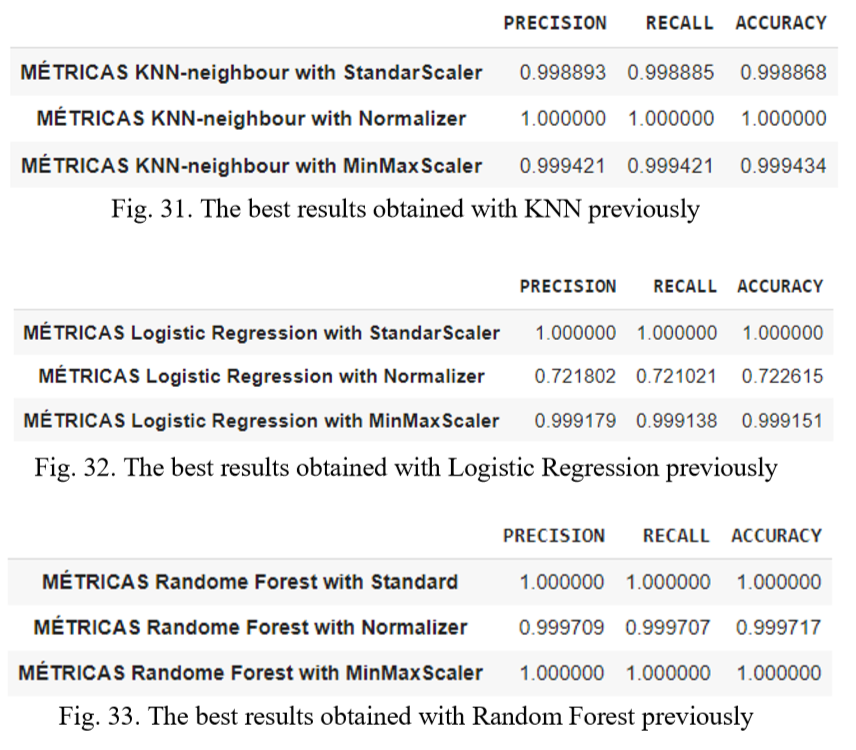